# DATA CLEANING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from pandas.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Read the dataset
df = pd.read_csv('crop_dataset2.csv')


In [4]:
# Display basic information about the dataset
print("Original Dataset Information:")
print(df.info())


Original Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2249 non-null   float64
 1   P            2255 non-null   float64
 2   K            2256 non-null   float64
 3   temperature  2248 non-null   float64
 4   humidity     2256 non-null   float64
 5   ph           2256 non-null   float64
 6   rainfall     2252 non-null   float64
 7   label        2246 non-null   object 
dtypes: float64(7), object(1)
memory usage: 141.8+ KB
None


## Summary Statistics Before Mean Imputation

In [5]:
# Summary statistics before mean imputation
print("\nSummary Statistics Before Mean Imputation:")
print(df.describe())



Summary Statistics Before Mean Imputation:
                 N            P            K  temperature     humidity  \
count  2249.000000  2255.000000  2256.000000  2248.000000  2256.000000   
mean     50.797243    54.704656    49.787234    25.999517    73.473716   
std      38.423455    45.531814    69.358780    12.594262    44.273251   
min    -100.000000  -100.000000  -100.000000  -100.000000  -100.000000   
25%      21.000000    28.000000    20.000000    22.769375    60.195432   
50%      37.000000    51.000000    32.000000    25.623092    80.457953   
75%      85.000000    68.000000    49.000000    28.580082    90.029164   
max     400.000000   790.000000  2050.000000   298.757015   888.376815   

                ph     rainfall  
count  2256.000000  2252.000000  
mean      6.521329   106.426456  
std       3.336467    86.044585  
min    -100.000000  -100.000000  
25%       5.961985    64.441330  
50%       6.425675    94.735907  
75%       6.924721   124.468311  
max      64.91506

## Perform Mean Imputation for Missing Values in Numeric Fields

In [6]:
# Perform mean imputation for missing values in numeric fields
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


## Summary Statistics After Mean Imputation

In [7]:
# Summary statistics after mean imputation
print("\nSummary Statistics After Mean Imputation:")
print(df.describe())



Summary Statistics After Mean Imputation:
                 N            P            K  temperature     humidity  \
count  2266.000000  2266.000000  2266.000000  2266.000000  2266.000000   
mean     50.797243    54.704656    49.787234    25.999517    73.473716   
std      38.278989    45.421117    69.205500    12.544119    44.175409   
min    -100.000000  -100.000000  -100.000000  -100.000000  -100.000000   
25%      21.000000    28.000000    20.000000    22.782380    60.270822   
50%      37.000000    51.000000    32.000000    25.662093    80.397325   
75%      84.000000    68.000000    49.000000    28.569980    90.016775   
max     400.000000   790.000000  2050.000000   298.757015   888.376815   

                ph     rainfall  
count  2266.000000  2266.000000  
mean      6.521329   106.426456  
std       3.329094    85.778252  
min    -100.000000  -100.000000  
25%       5.966047    64.572456  
50%       6.429899    95.146751  
75%       6.923130   124.224123  
max      64.915062

##  Remove Rows with Empty Label Fields

In [8]:
# Remove rows with empty label fields
df = df.dropna(subset=['label'])


##  Check for Duplicate Rows

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)



Duplicate Rows:
          N     P     K  temperature   humidity        ph    rainfall  \
2200   32.0  73.0  81.0    20.450786  15.403121  5.988993   92.683737   
2201   87.0  38.0  29.0    25.204068  57.883705  6.652643  156.145725   
2202   34.0  16.0  25.0    30.072026  50.960405  6.107296   92.096098   
2203   35.0  41.0  18.0    28.705627  81.592007  6.705009   59.870654   
2204  119.0   7.0  55.0    26.038677  84.637838  6.031424   44.399338   
...     ...   ...   ...          ...        ...       ...         ...   
2260   72.0  51.0  40.0    23.206835  74.099570  7.422318  199.476678   
2261  110.0  78.0  50.0    25.937302  78.898644  5.915569   98.217475   
2262   99.0  73.0  53.0    26.290390  81.060038  5.871702  118.673037   
2263   39.0  42.0  20.0    29.349971  61.253539  8.055909   40.828407   
2265  110.0  15.0  48.0    28.578200  92.865974  6.212567   27.598718   

           label  
2200    chickpea  
2201      coffee  
2202       mango  
2203    mungbean  
2204  water

## Visualization of Boxplots Before Cleaning

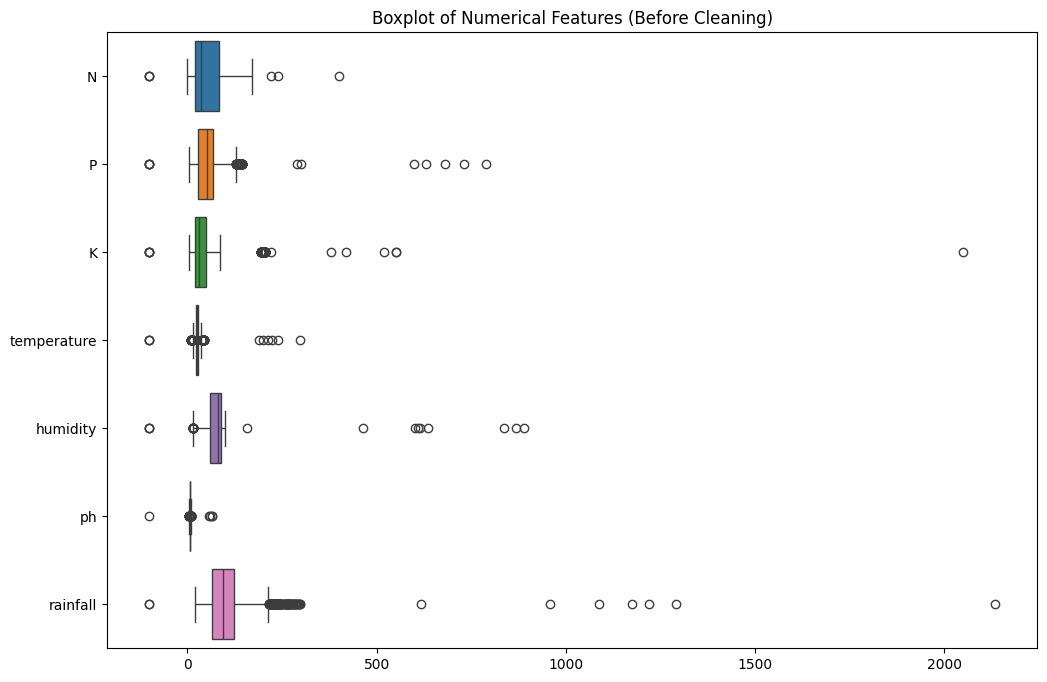

In [10]:
# Visualization of boxplots before cleaning
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplot of Numerical Features (Before Cleaning)')
plt.show()


## Remove Outliers Using Z-score Method

In [11]:
# Remove outliers (e.g., using Z-score method)
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned = df[filtered_entries]


## Display Basic Information About the Cleaned Dataset

In [12]:
# Display basic information about the cleaned dataset
print("\nCleaned Dataset Information:")
print(df_cleaned.info())



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2190 non-null   float64
 1   P            2190 non-null   float64
 2   K            2190 non-null   float64
 3   temperature  2190 non-null   float64
 4   humidity     2190 non-null   float64
 5   ph           2190 non-null   float64
 6   rainfall     2190 non-null   float64
 7   label        2190 non-null   object 
dtypes: float64(7), object(1)
memory usage: 154.0+ KB
None


## Visualization of Boxplots After Cleaning

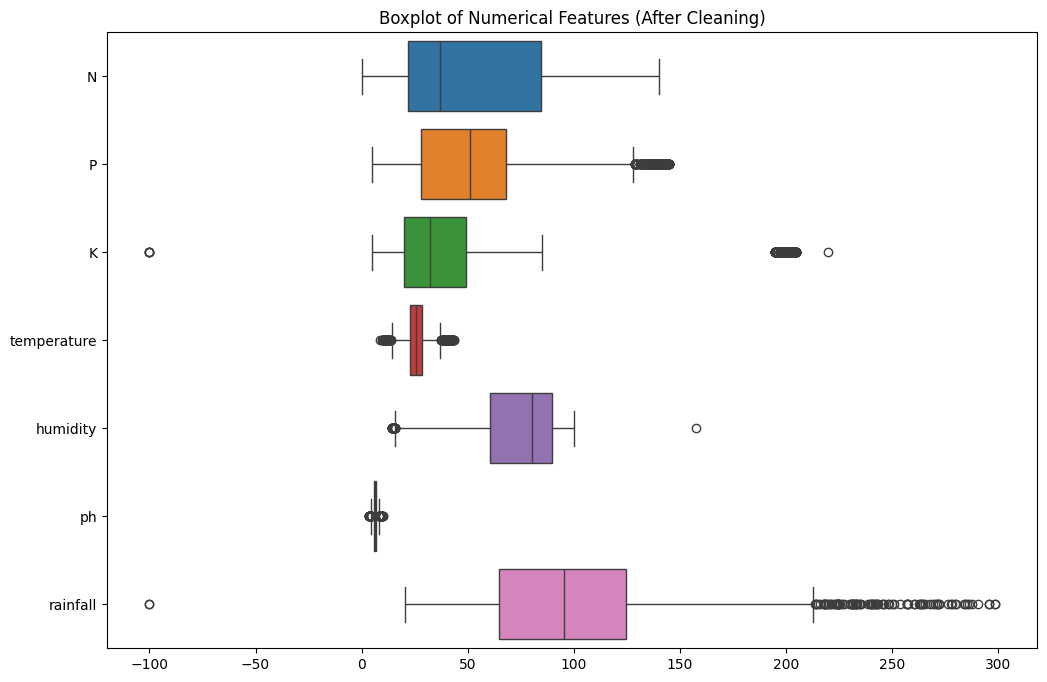

In [13]:
# Visualization of boxplots after cleaning
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplot of Numerical Features (After Cleaning)')
plt.show()


## Create Correlation Matrix for All Numerical Features and Plot Heatmap

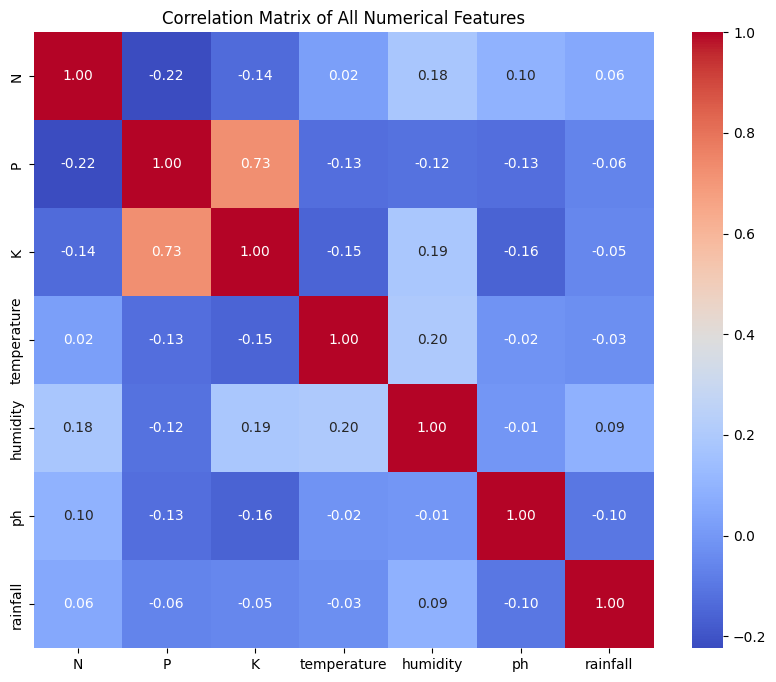

In [14]:
# Create correlation matrix for all numerical features and plot heatmap
plt.figure(figsize=(10, 8))
corr_all = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numerical Features')
plt.show()


## Create Correlation Matrices for Each Crop and Plot Heatmaps

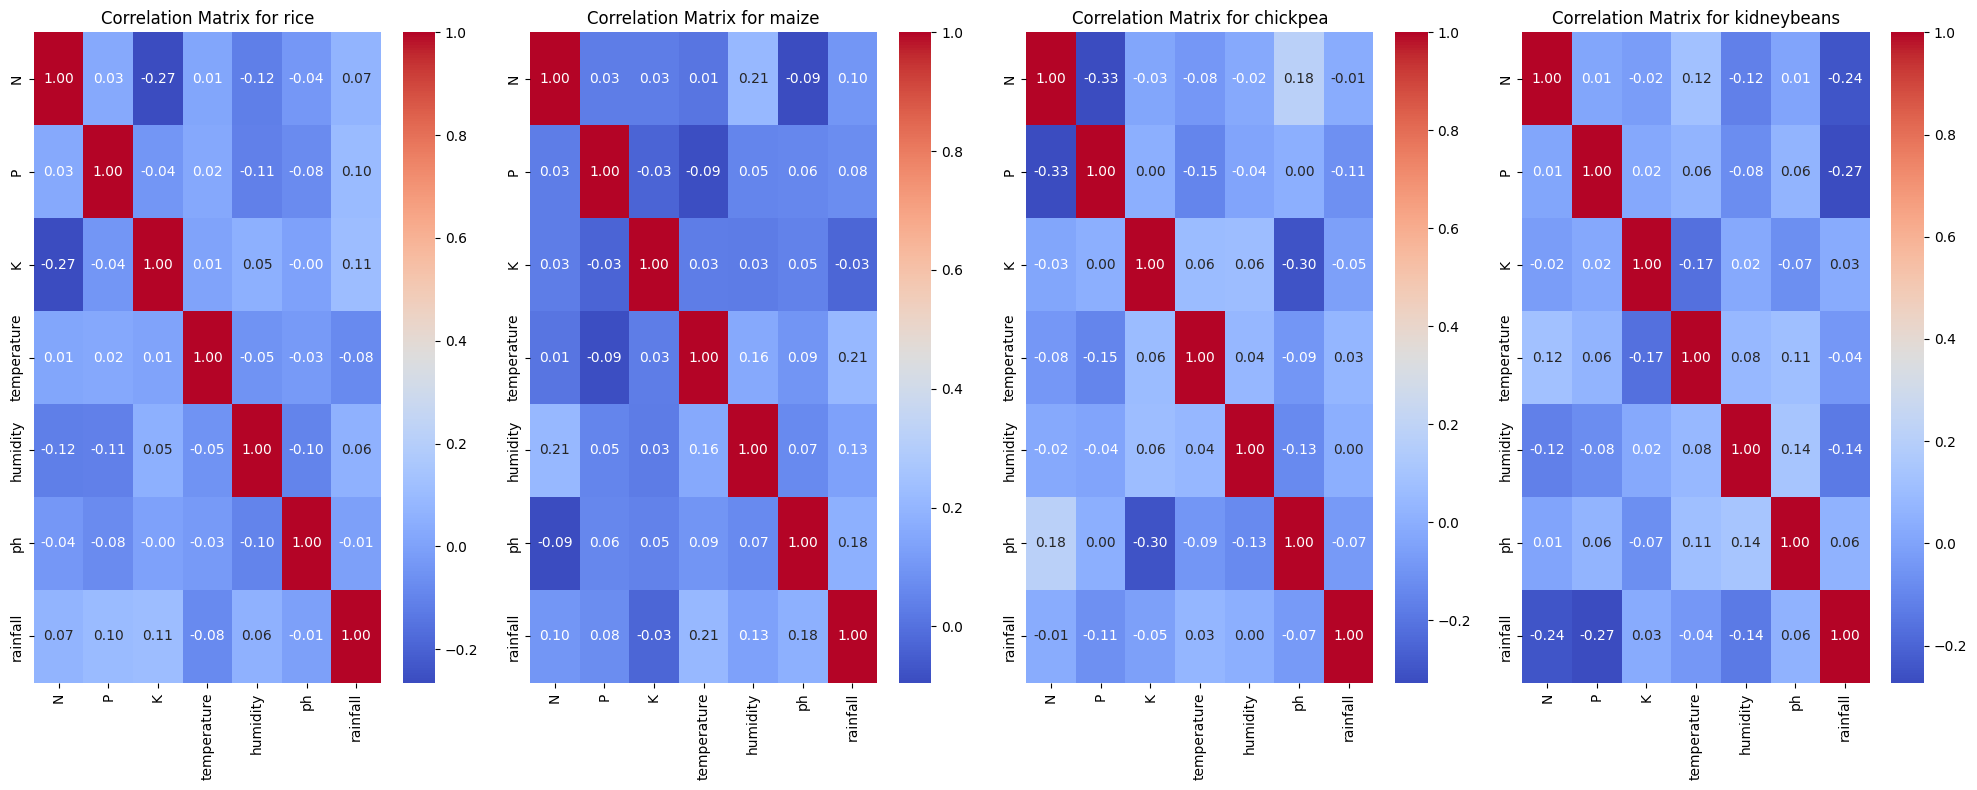

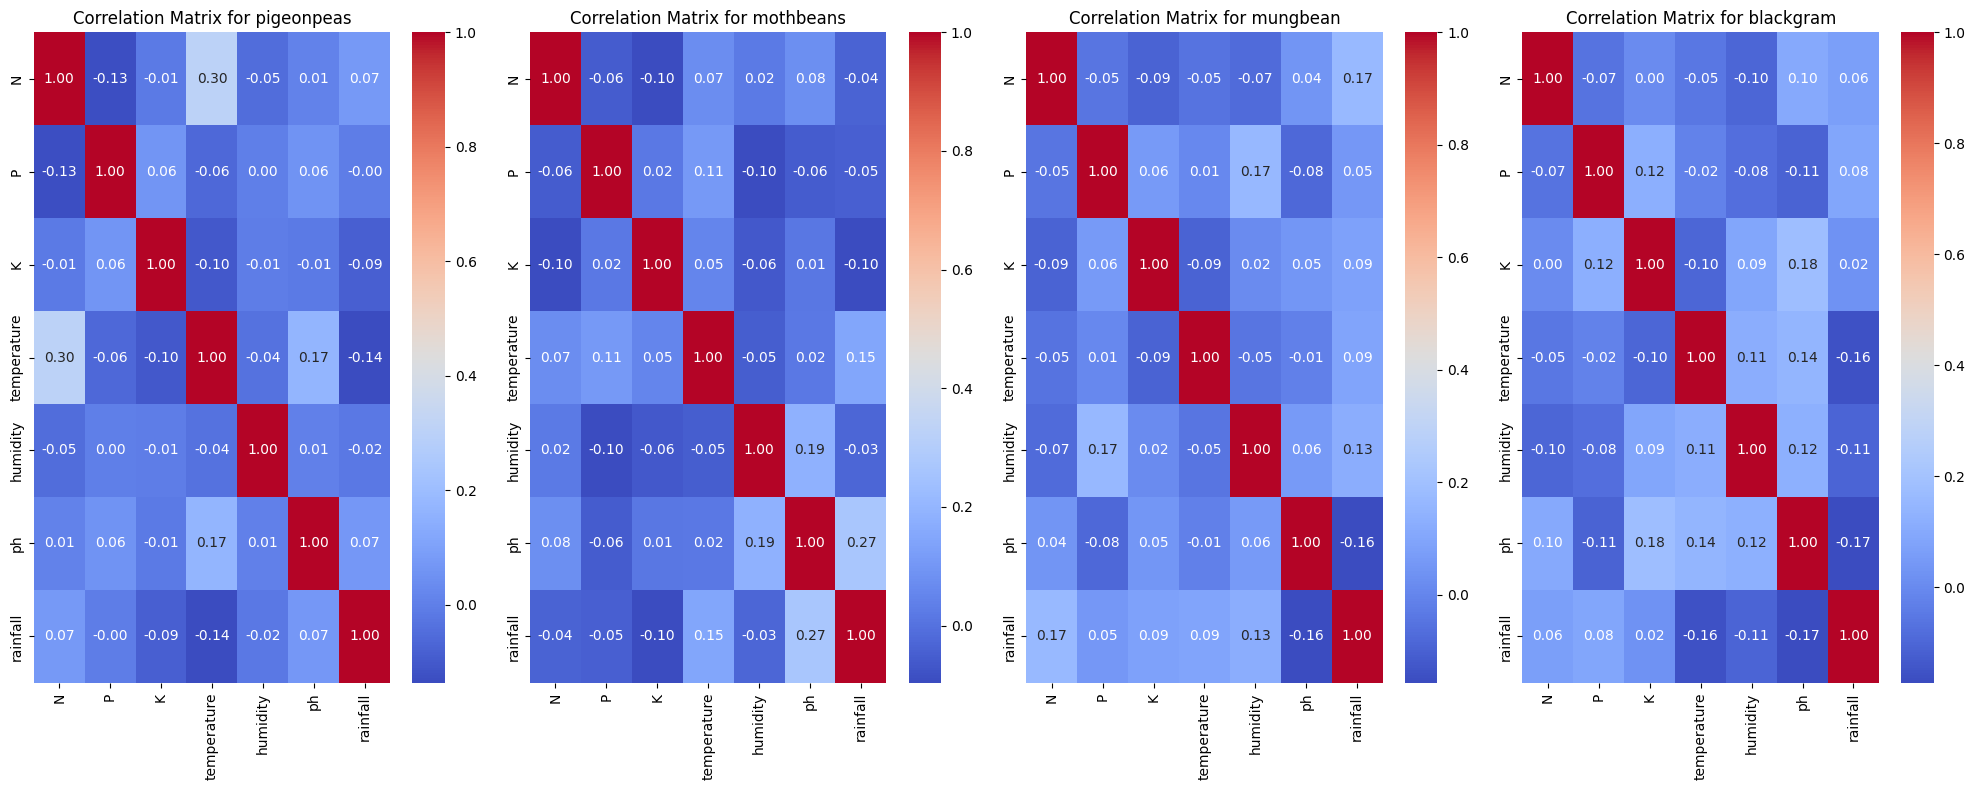

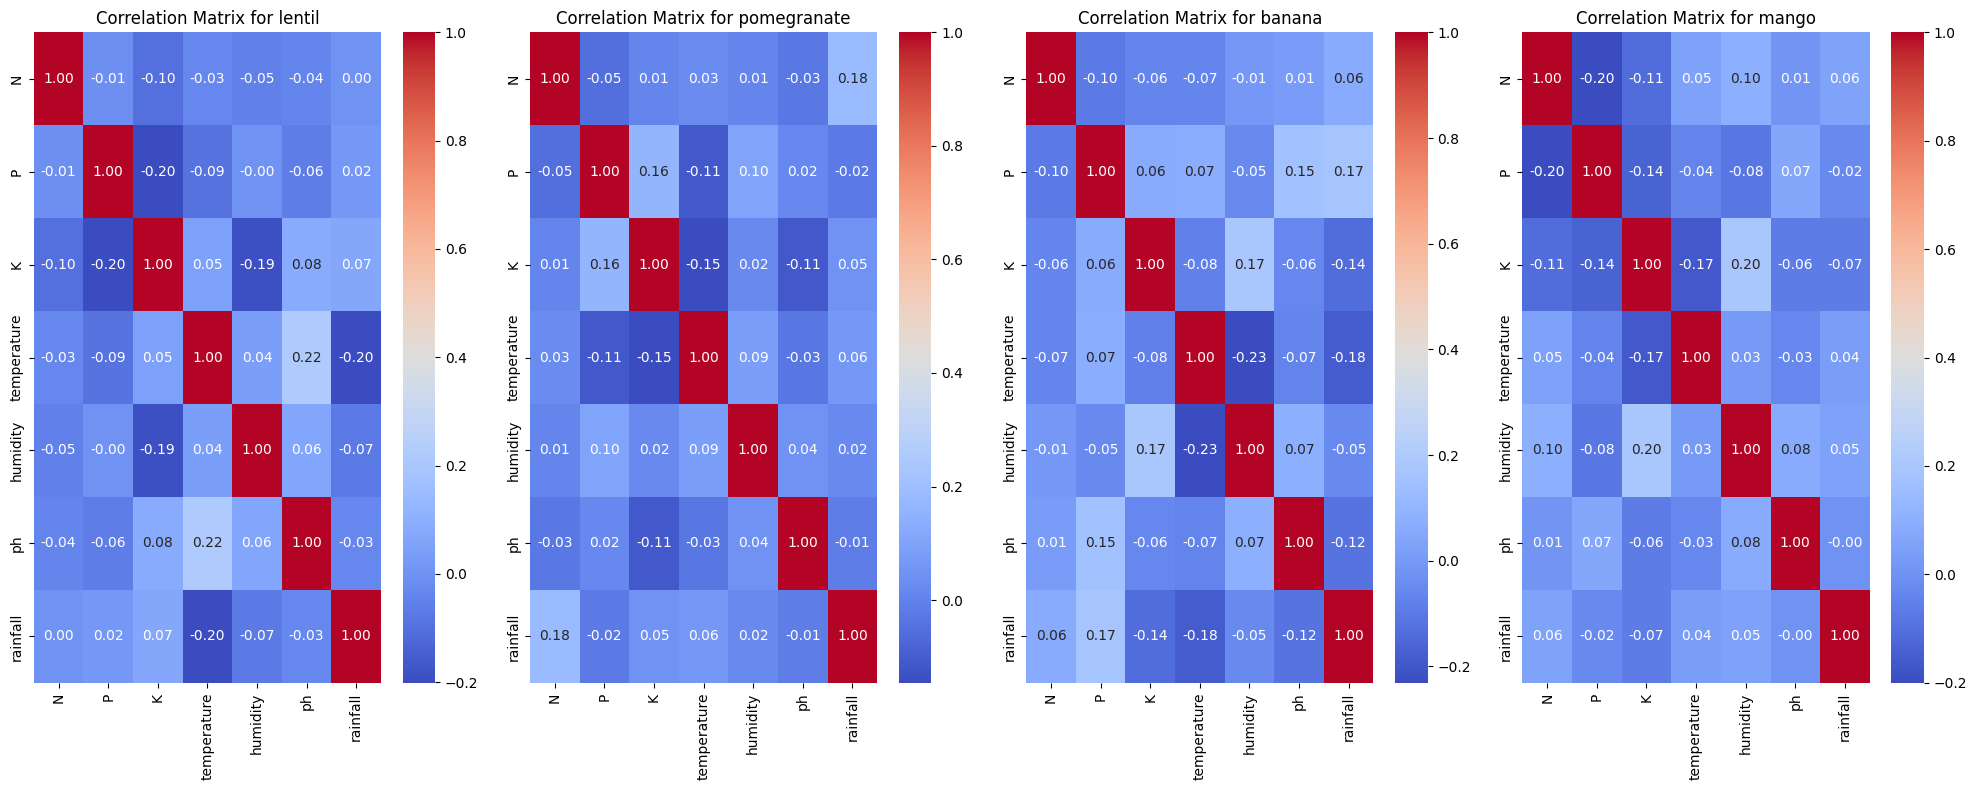

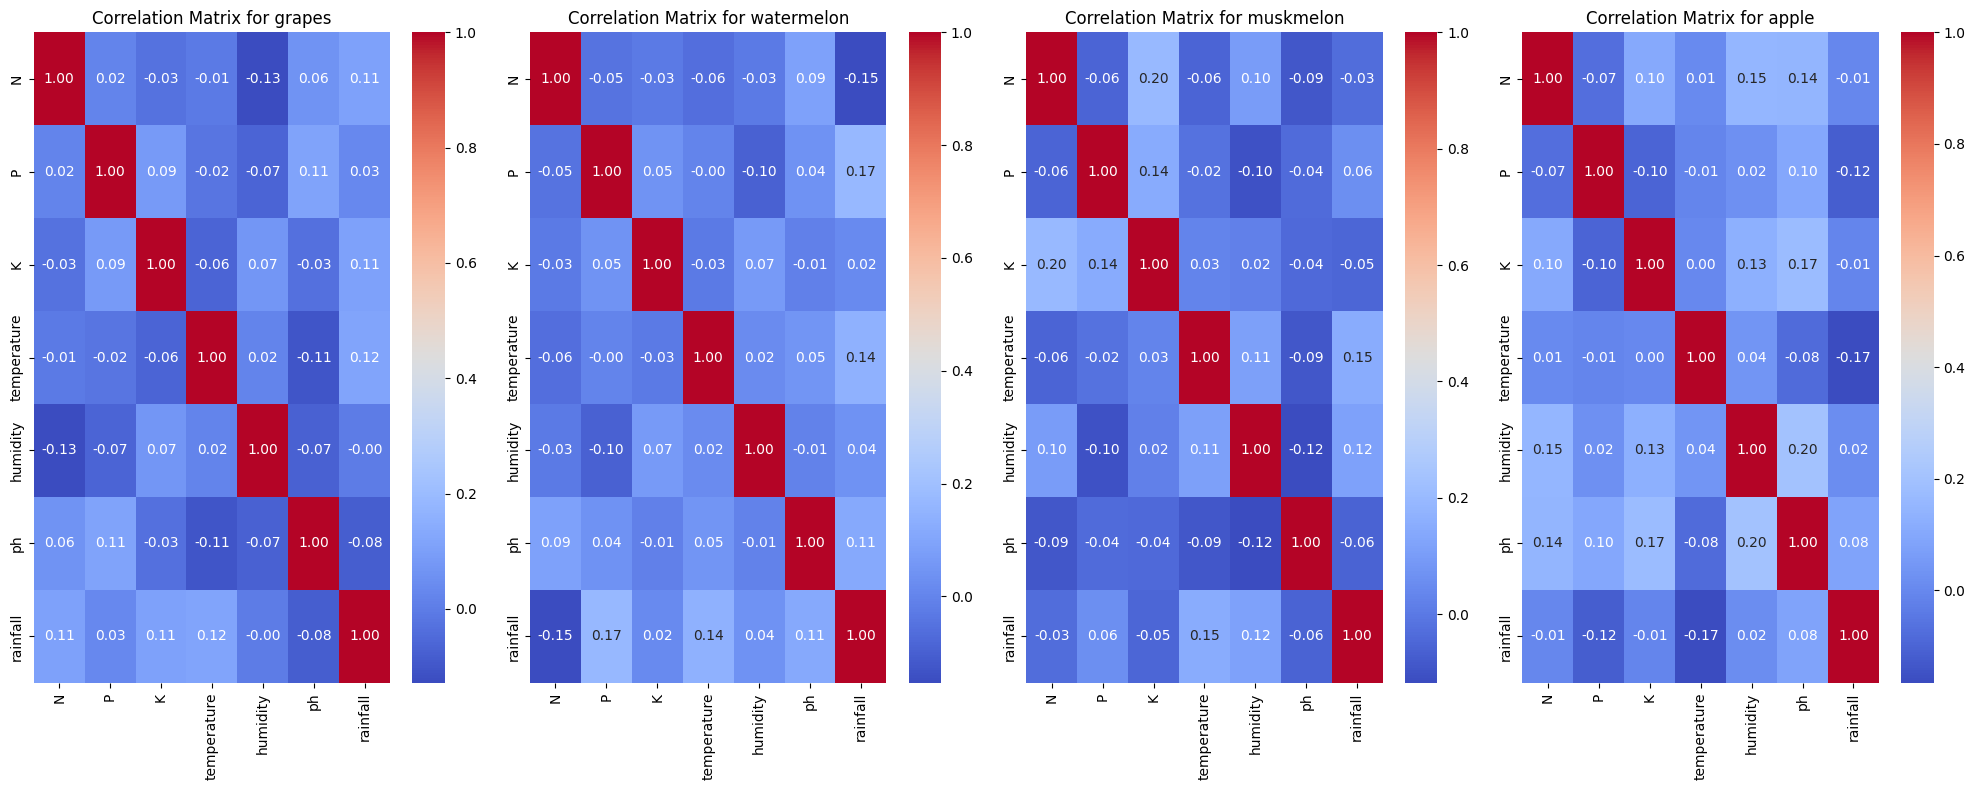

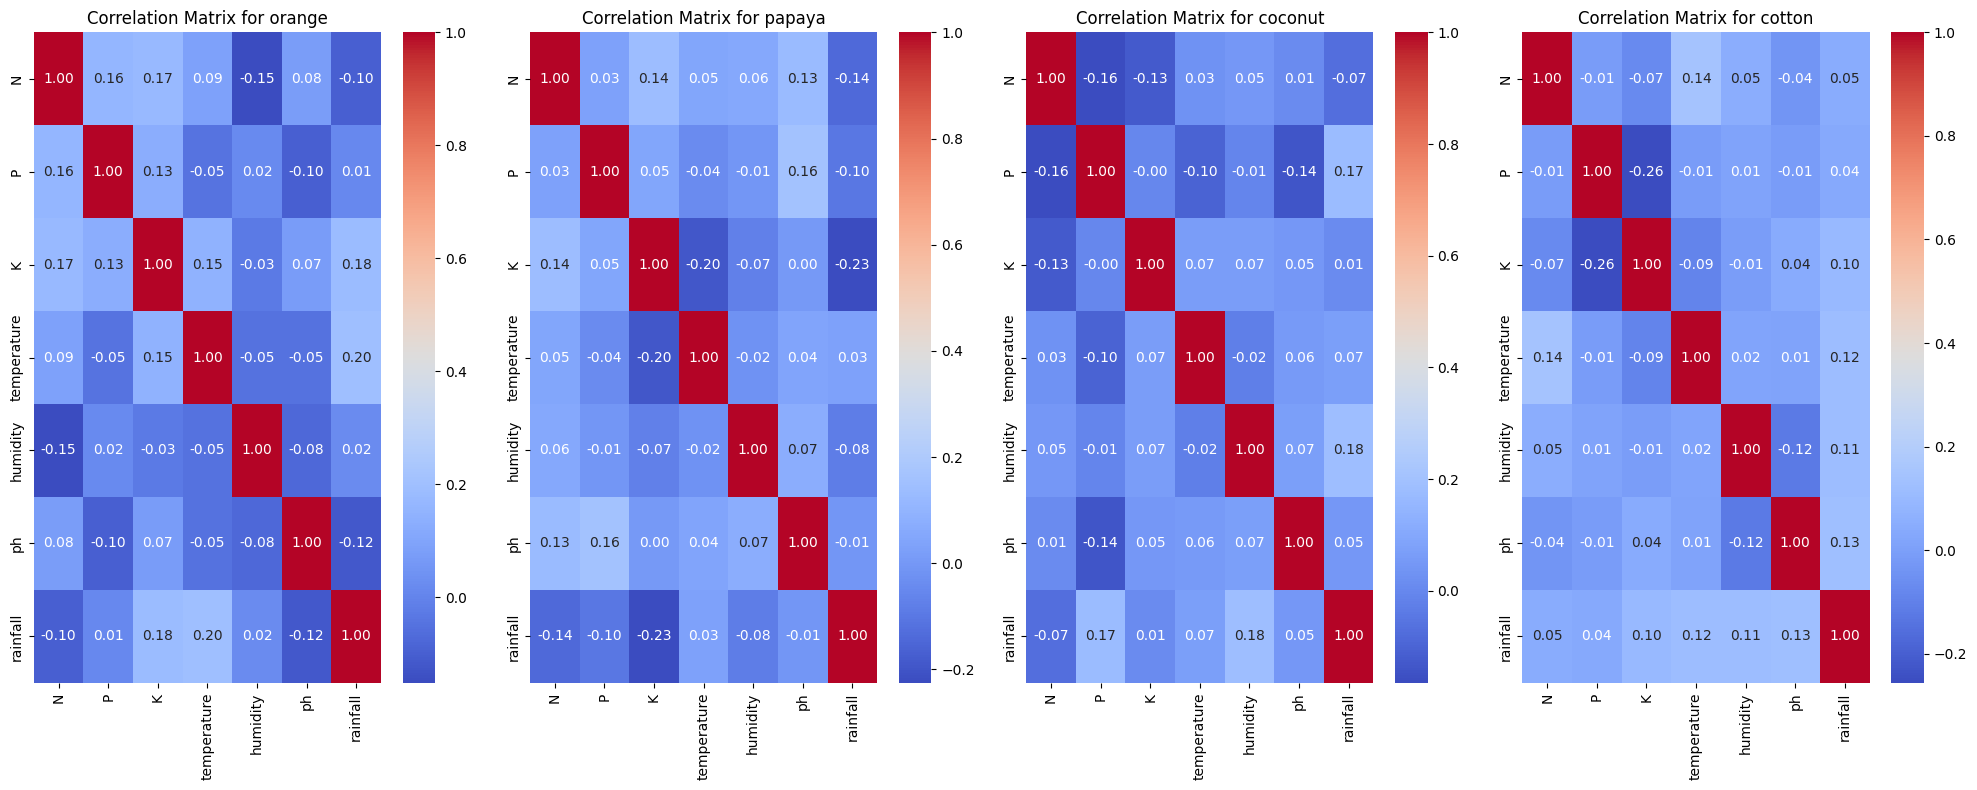

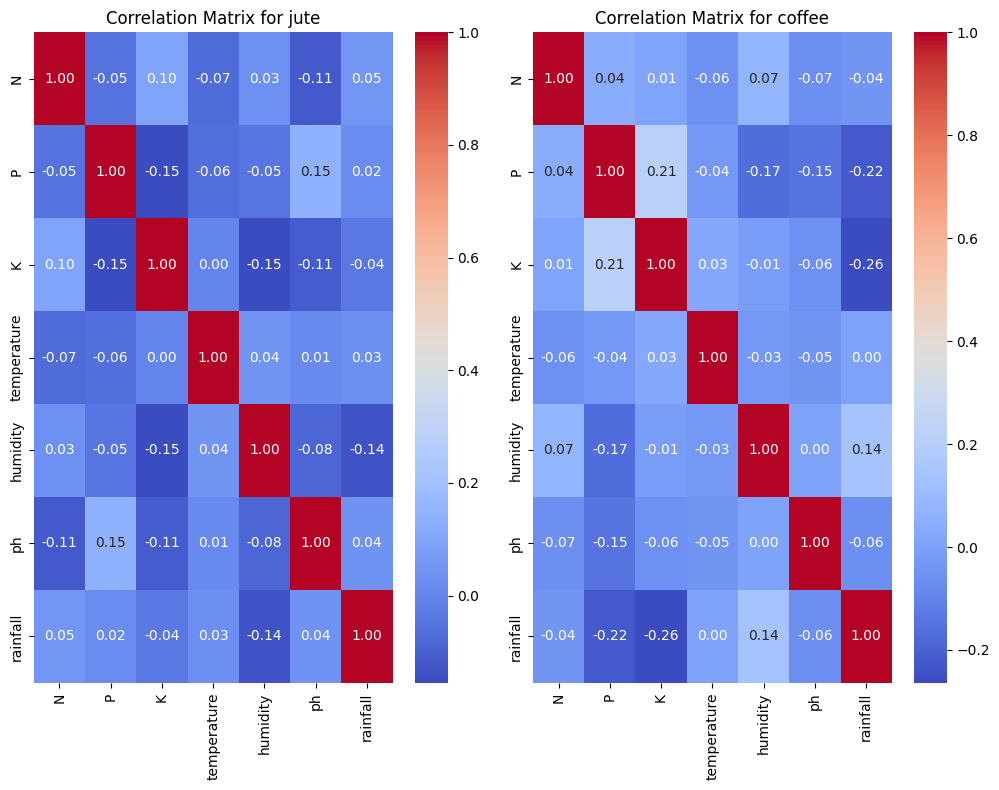

In [15]:
# Create correlation matrices for each crop and plot heatmaps
unique_crops = df_cleaned['label'].unique()
num_heatmaps_per_row = 4
total_heatmaps = len(unique_crops)
num_rows = int(np.ceil(total_heatmaps / num_heatmaps_per_row))

for i in range(0, total_heatmaps, num_heatmaps_per_row):
    plt.figure(figsize=(20, 8))
    for j, crop in enumerate(unique_crops[i:i+num_heatmaps_per_row]):
        plt.subplot(1, num_heatmaps_per_row, j + 1)
        crop_df = df_cleaned[df_cleaned['label'] == crop]
        corr = crop_df.select_dtypes(include=['float64', 'int64']).corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix for {crop}')
    plt.tight_layout()
    plt.show()


## Class Distribution

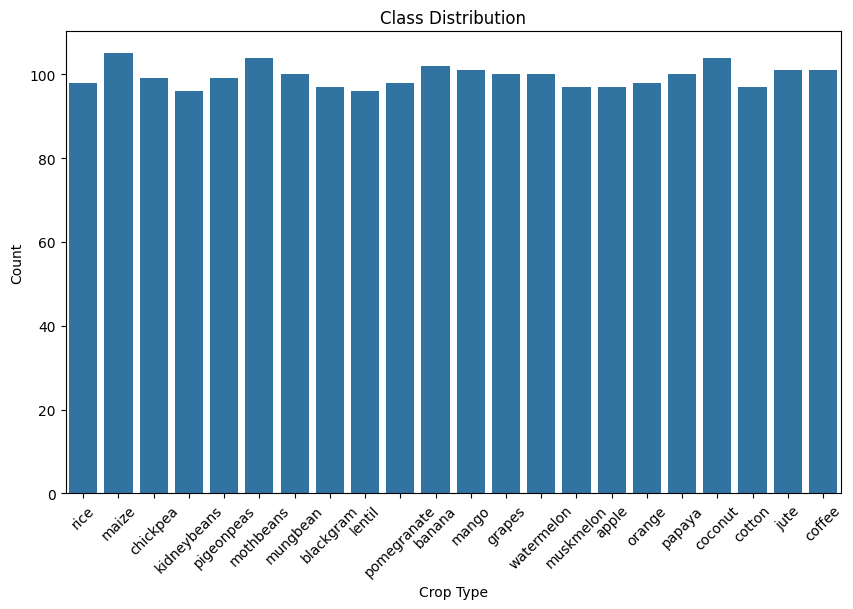

In [16]:
# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='label')
plt.title('Class Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Faceted Distribution

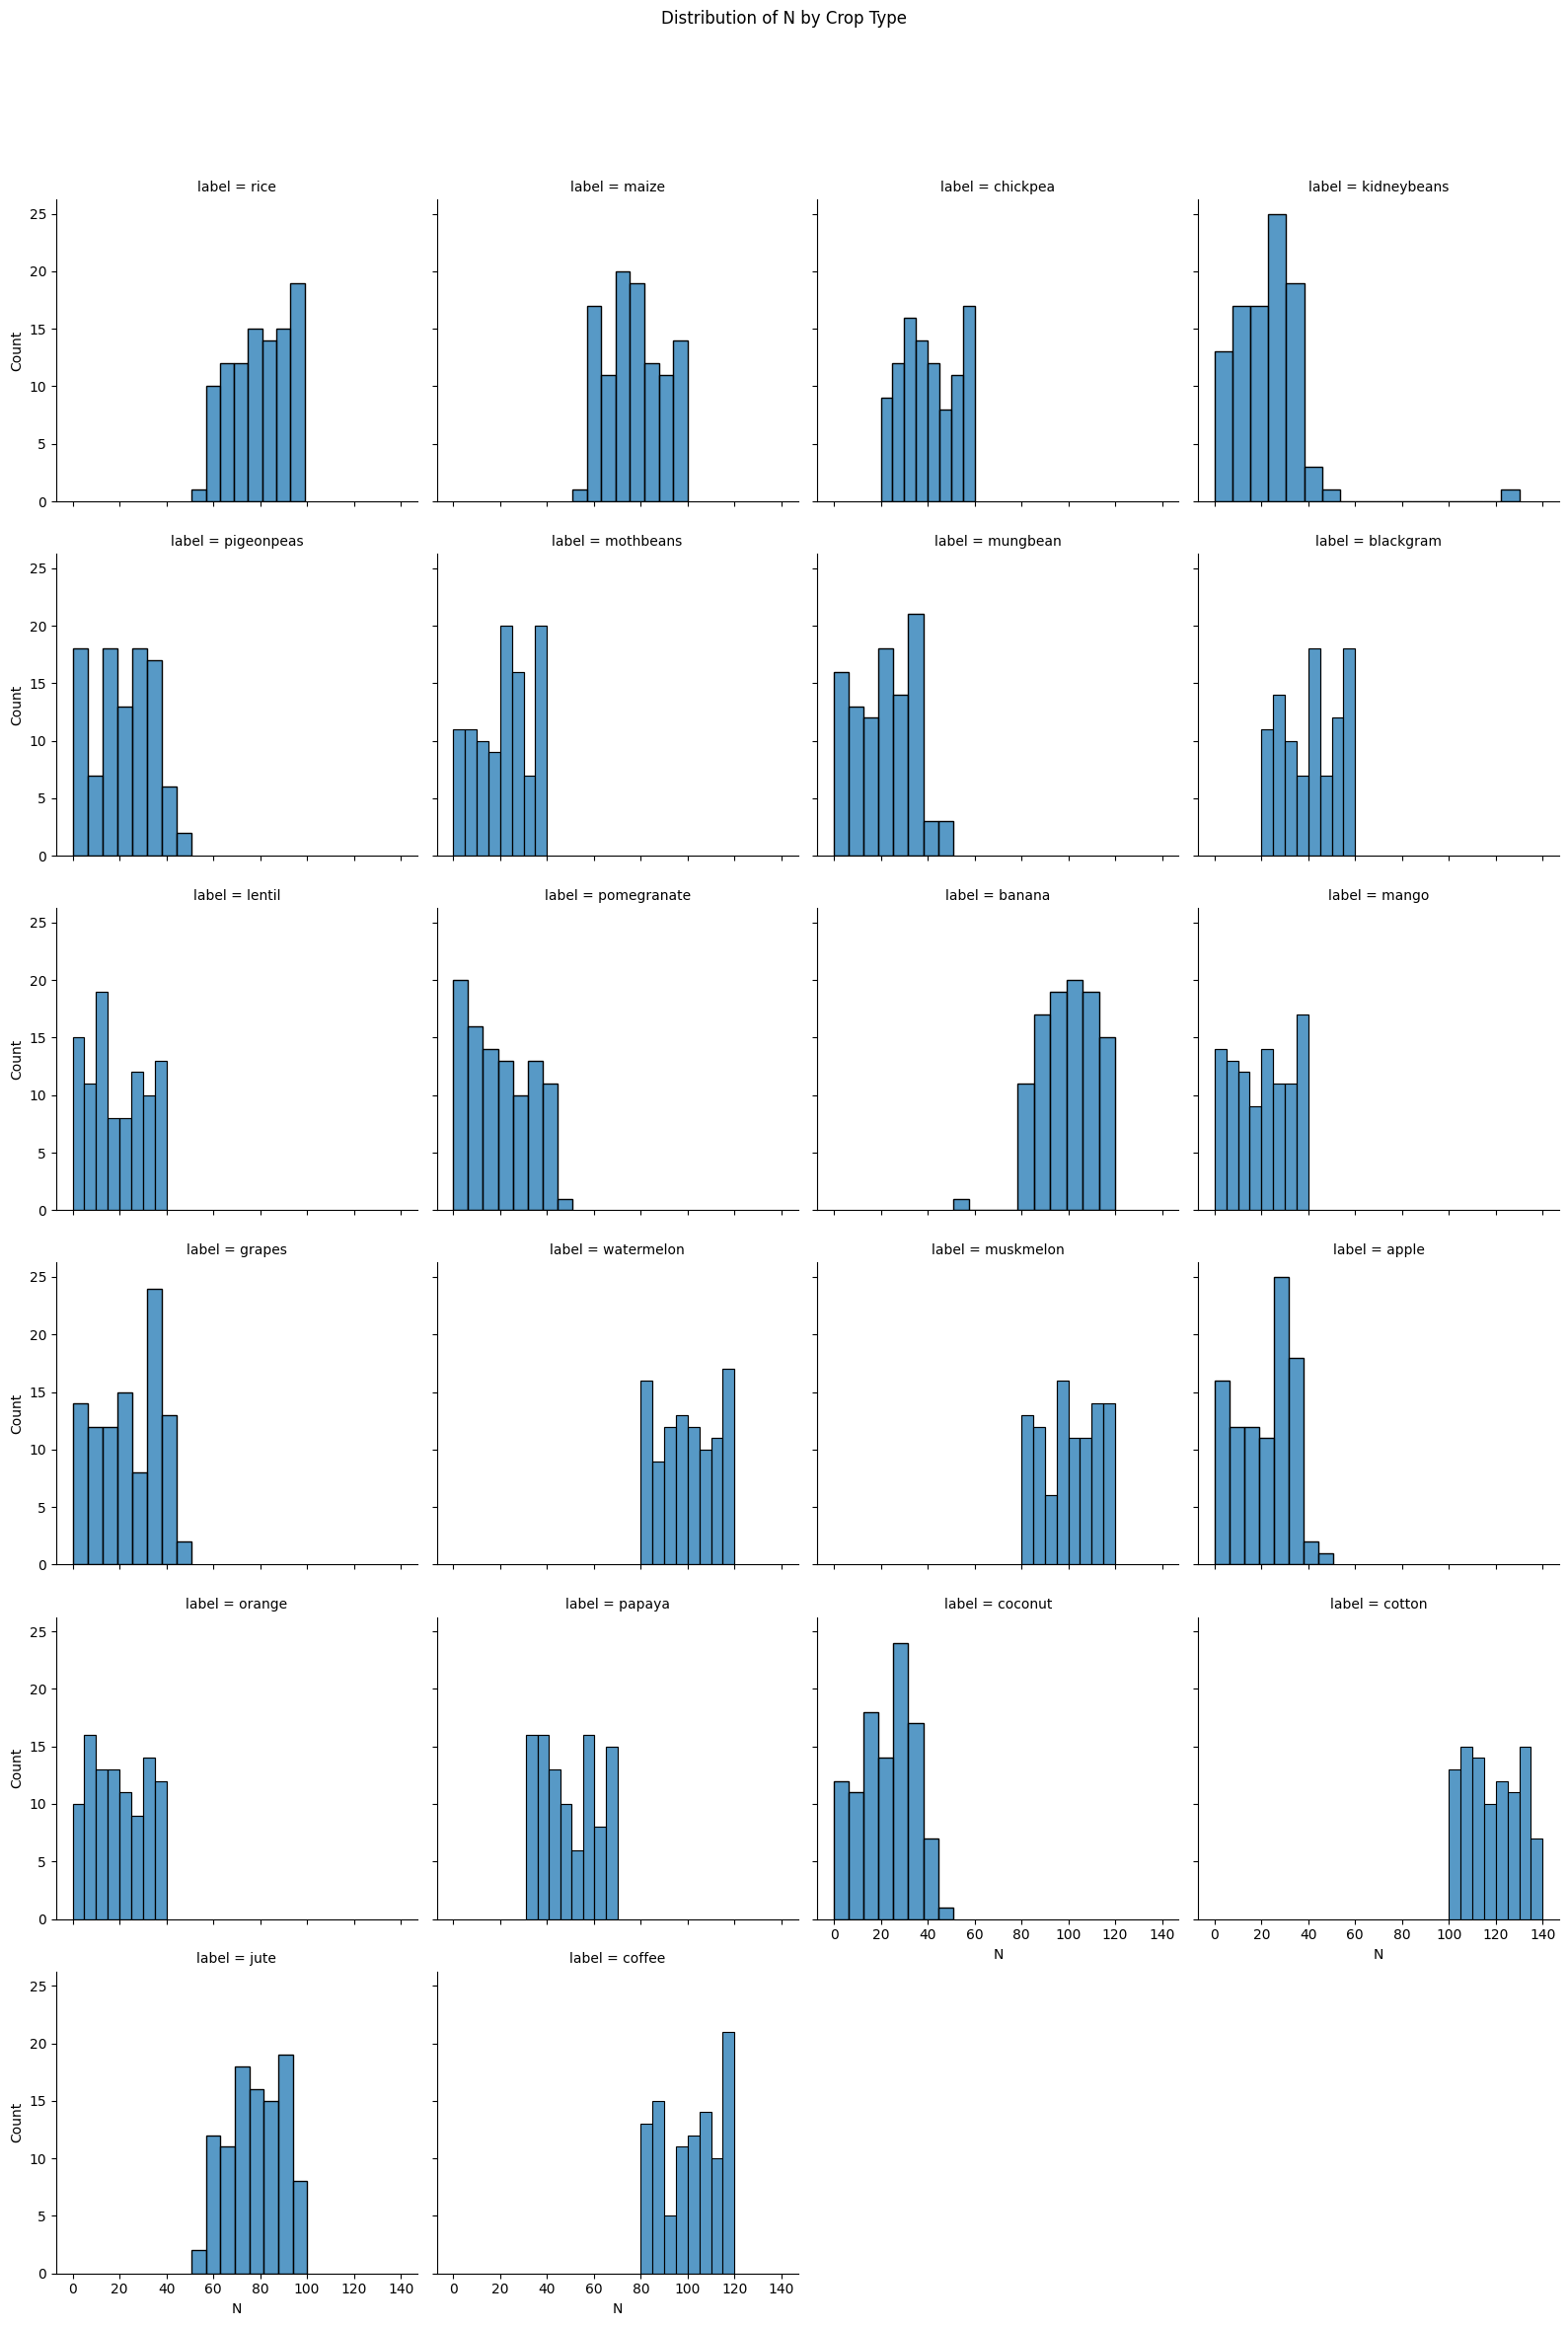

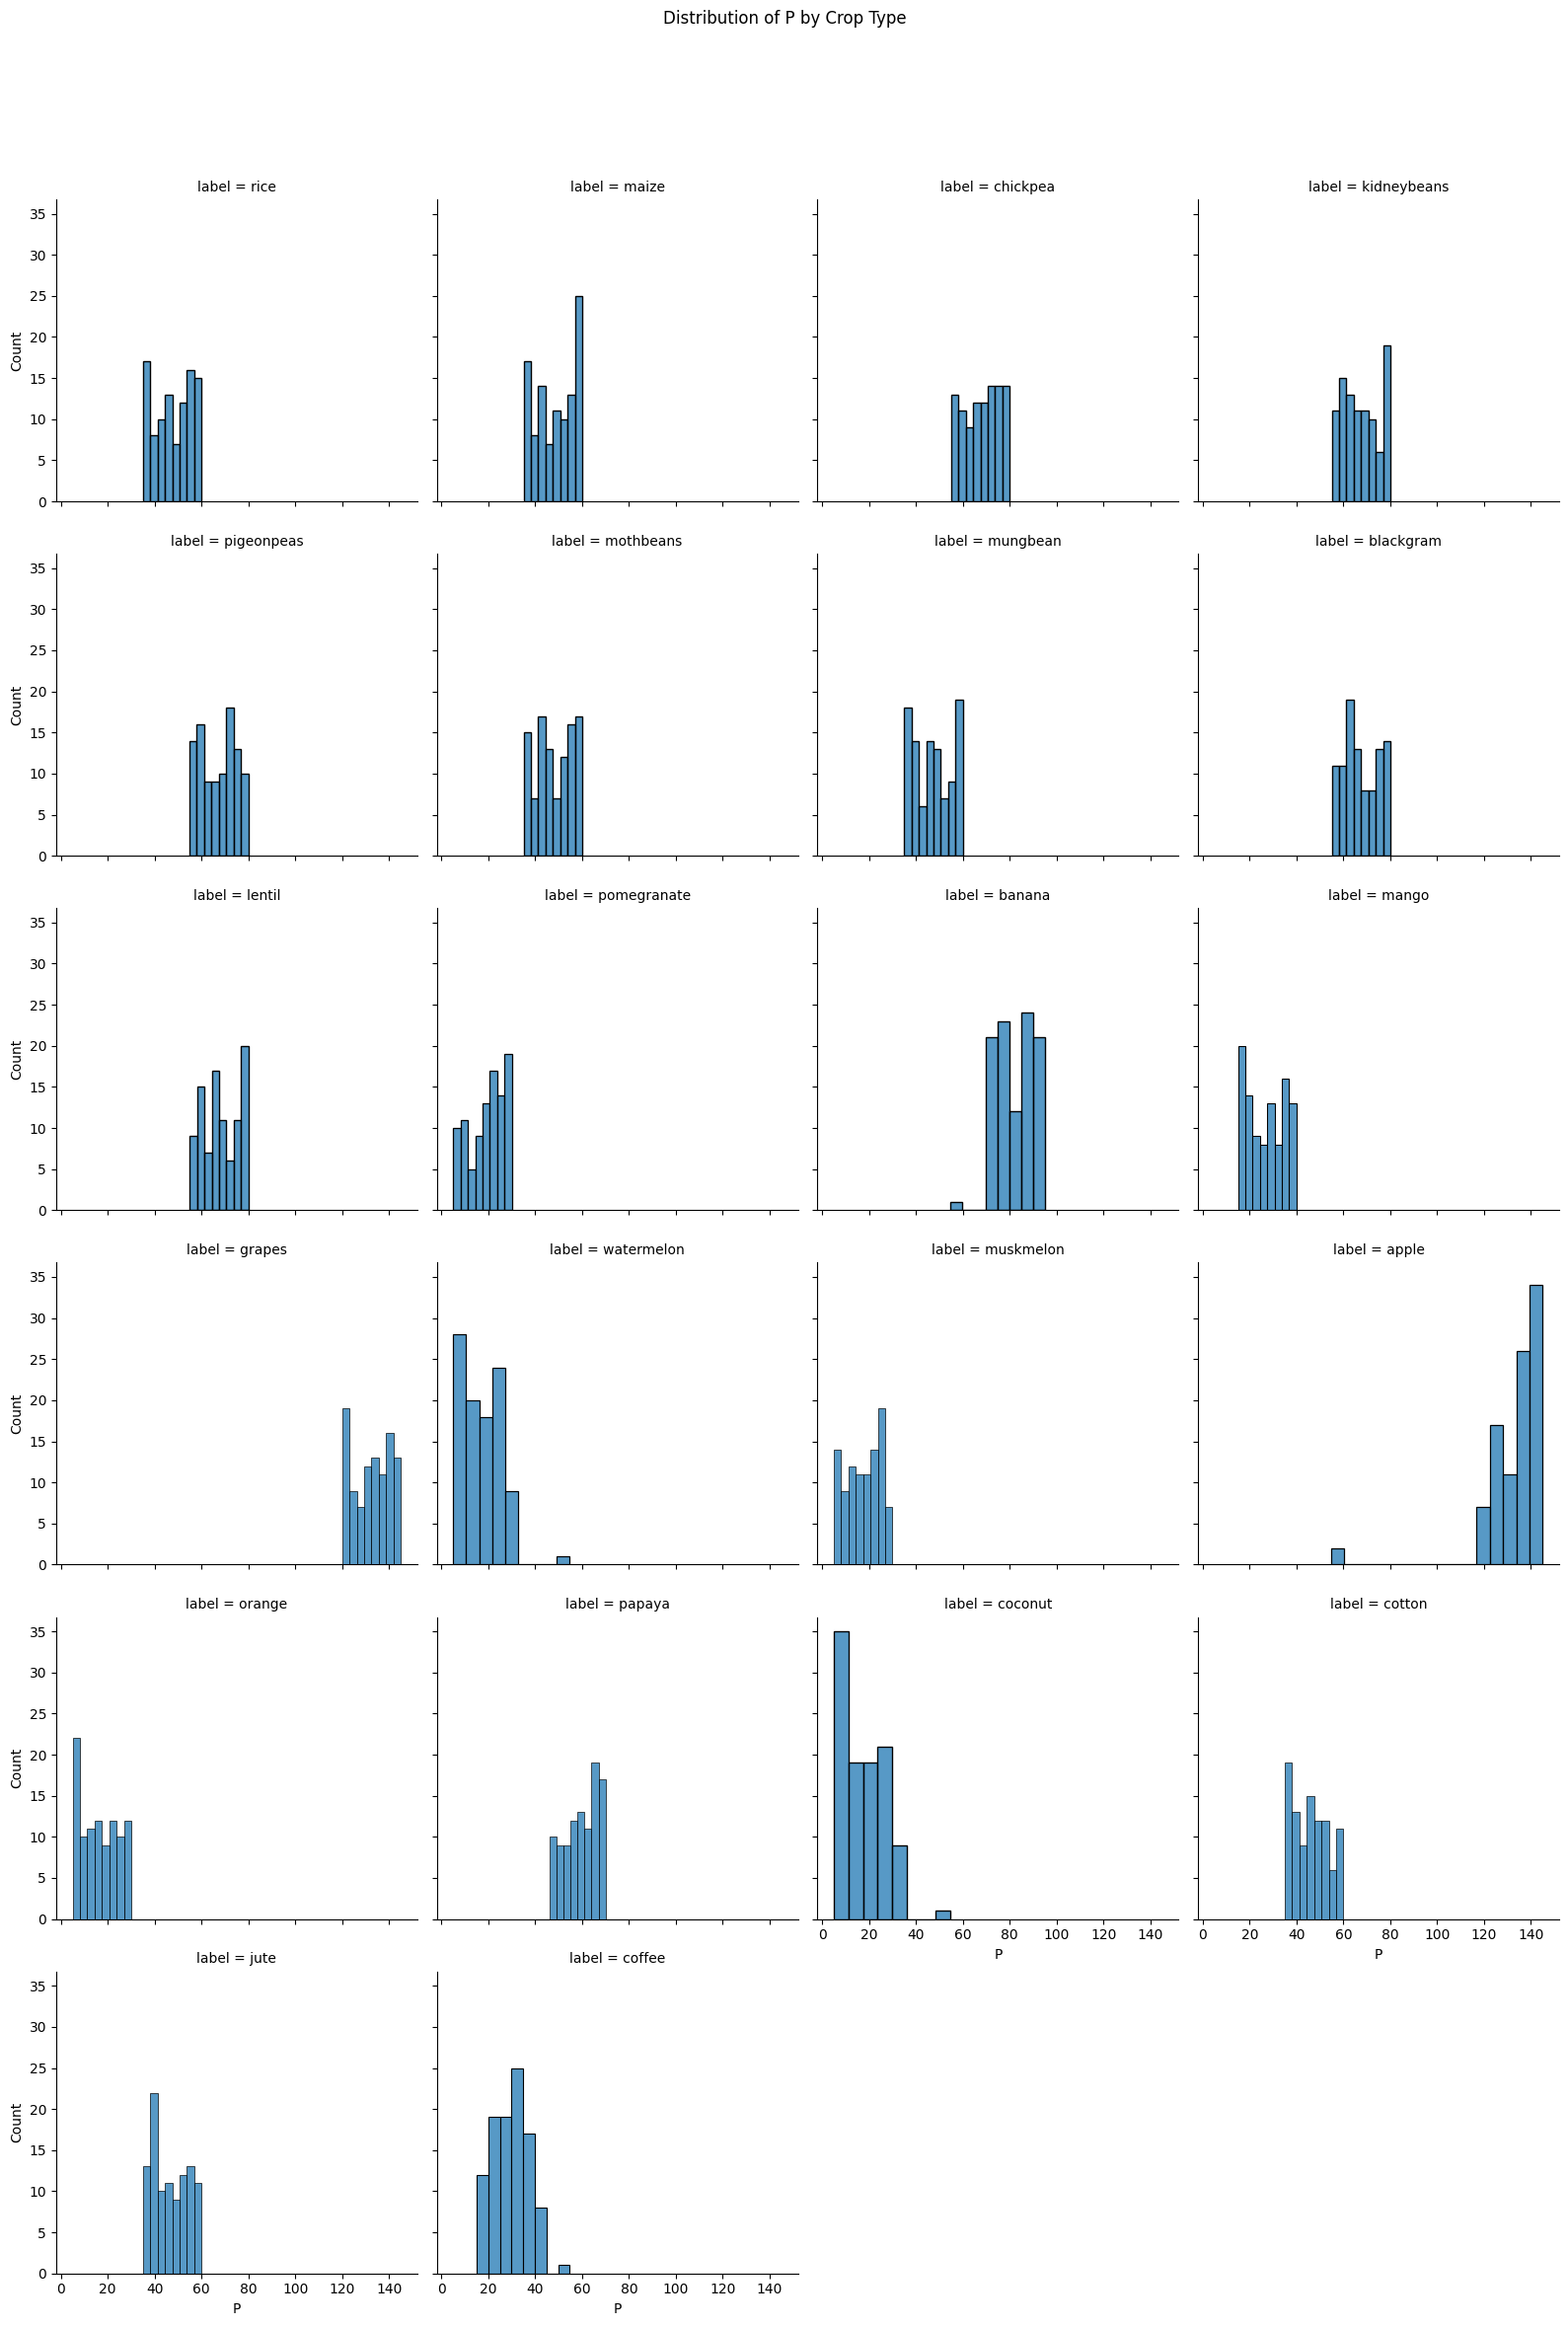

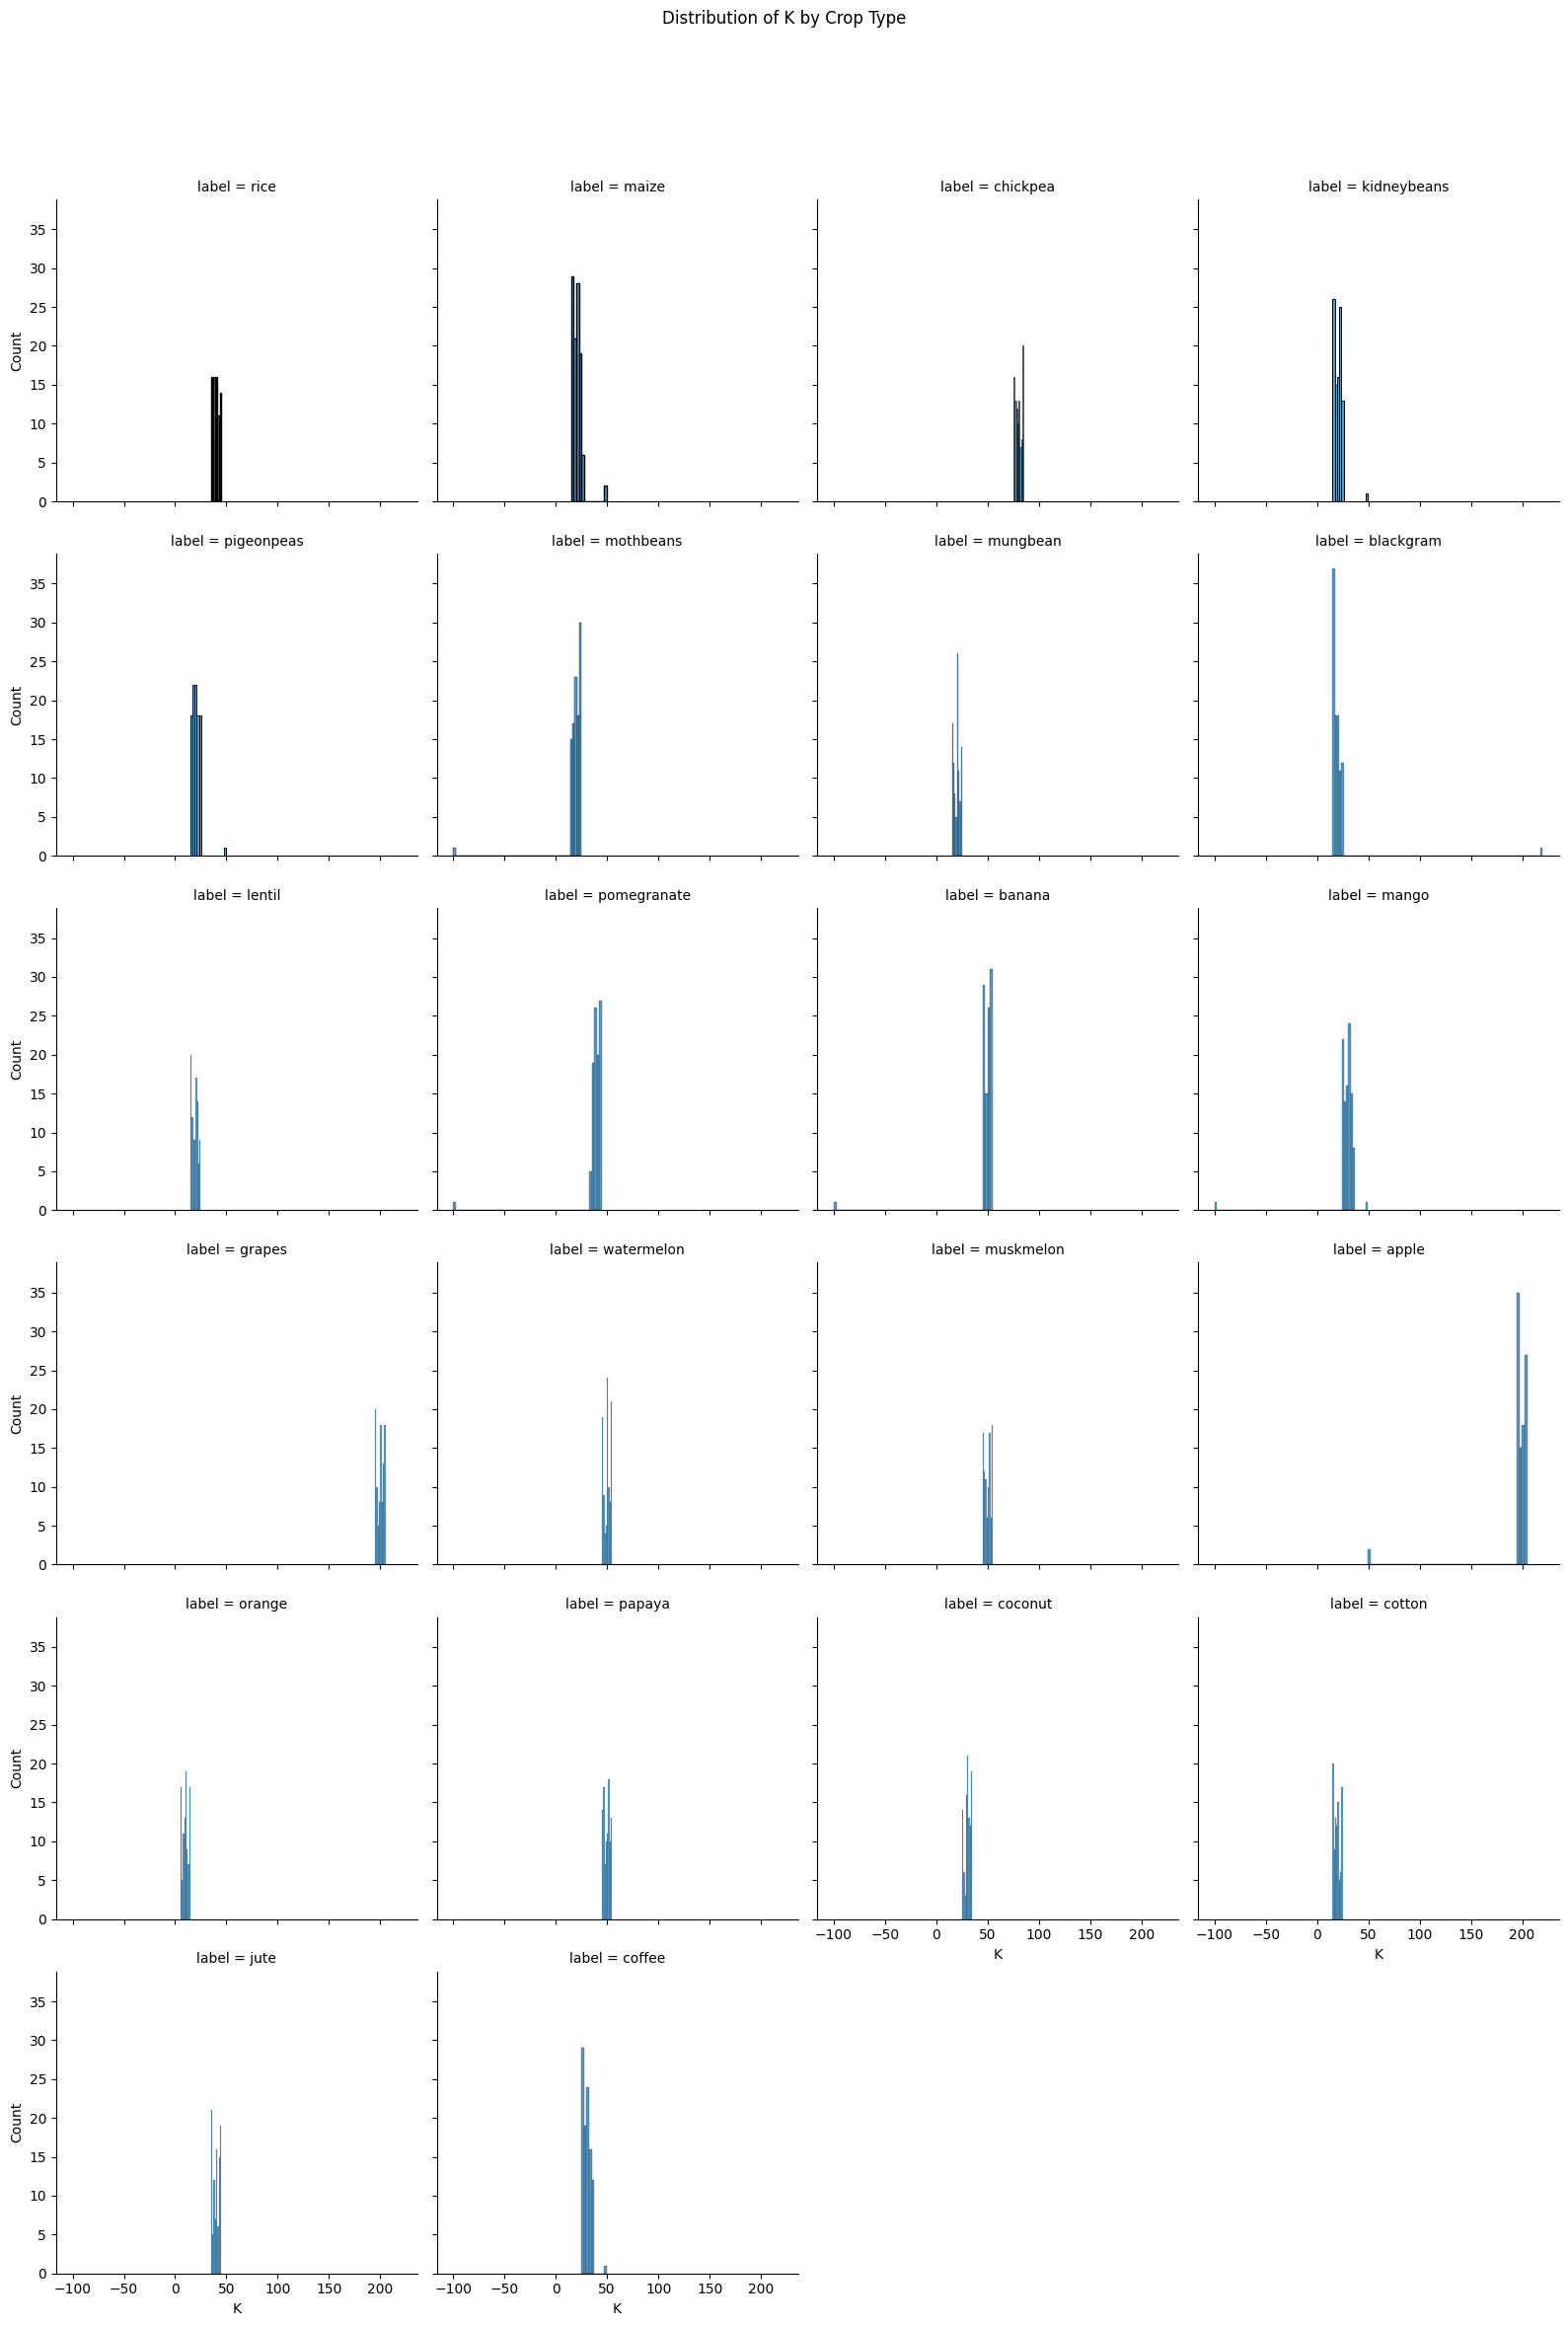

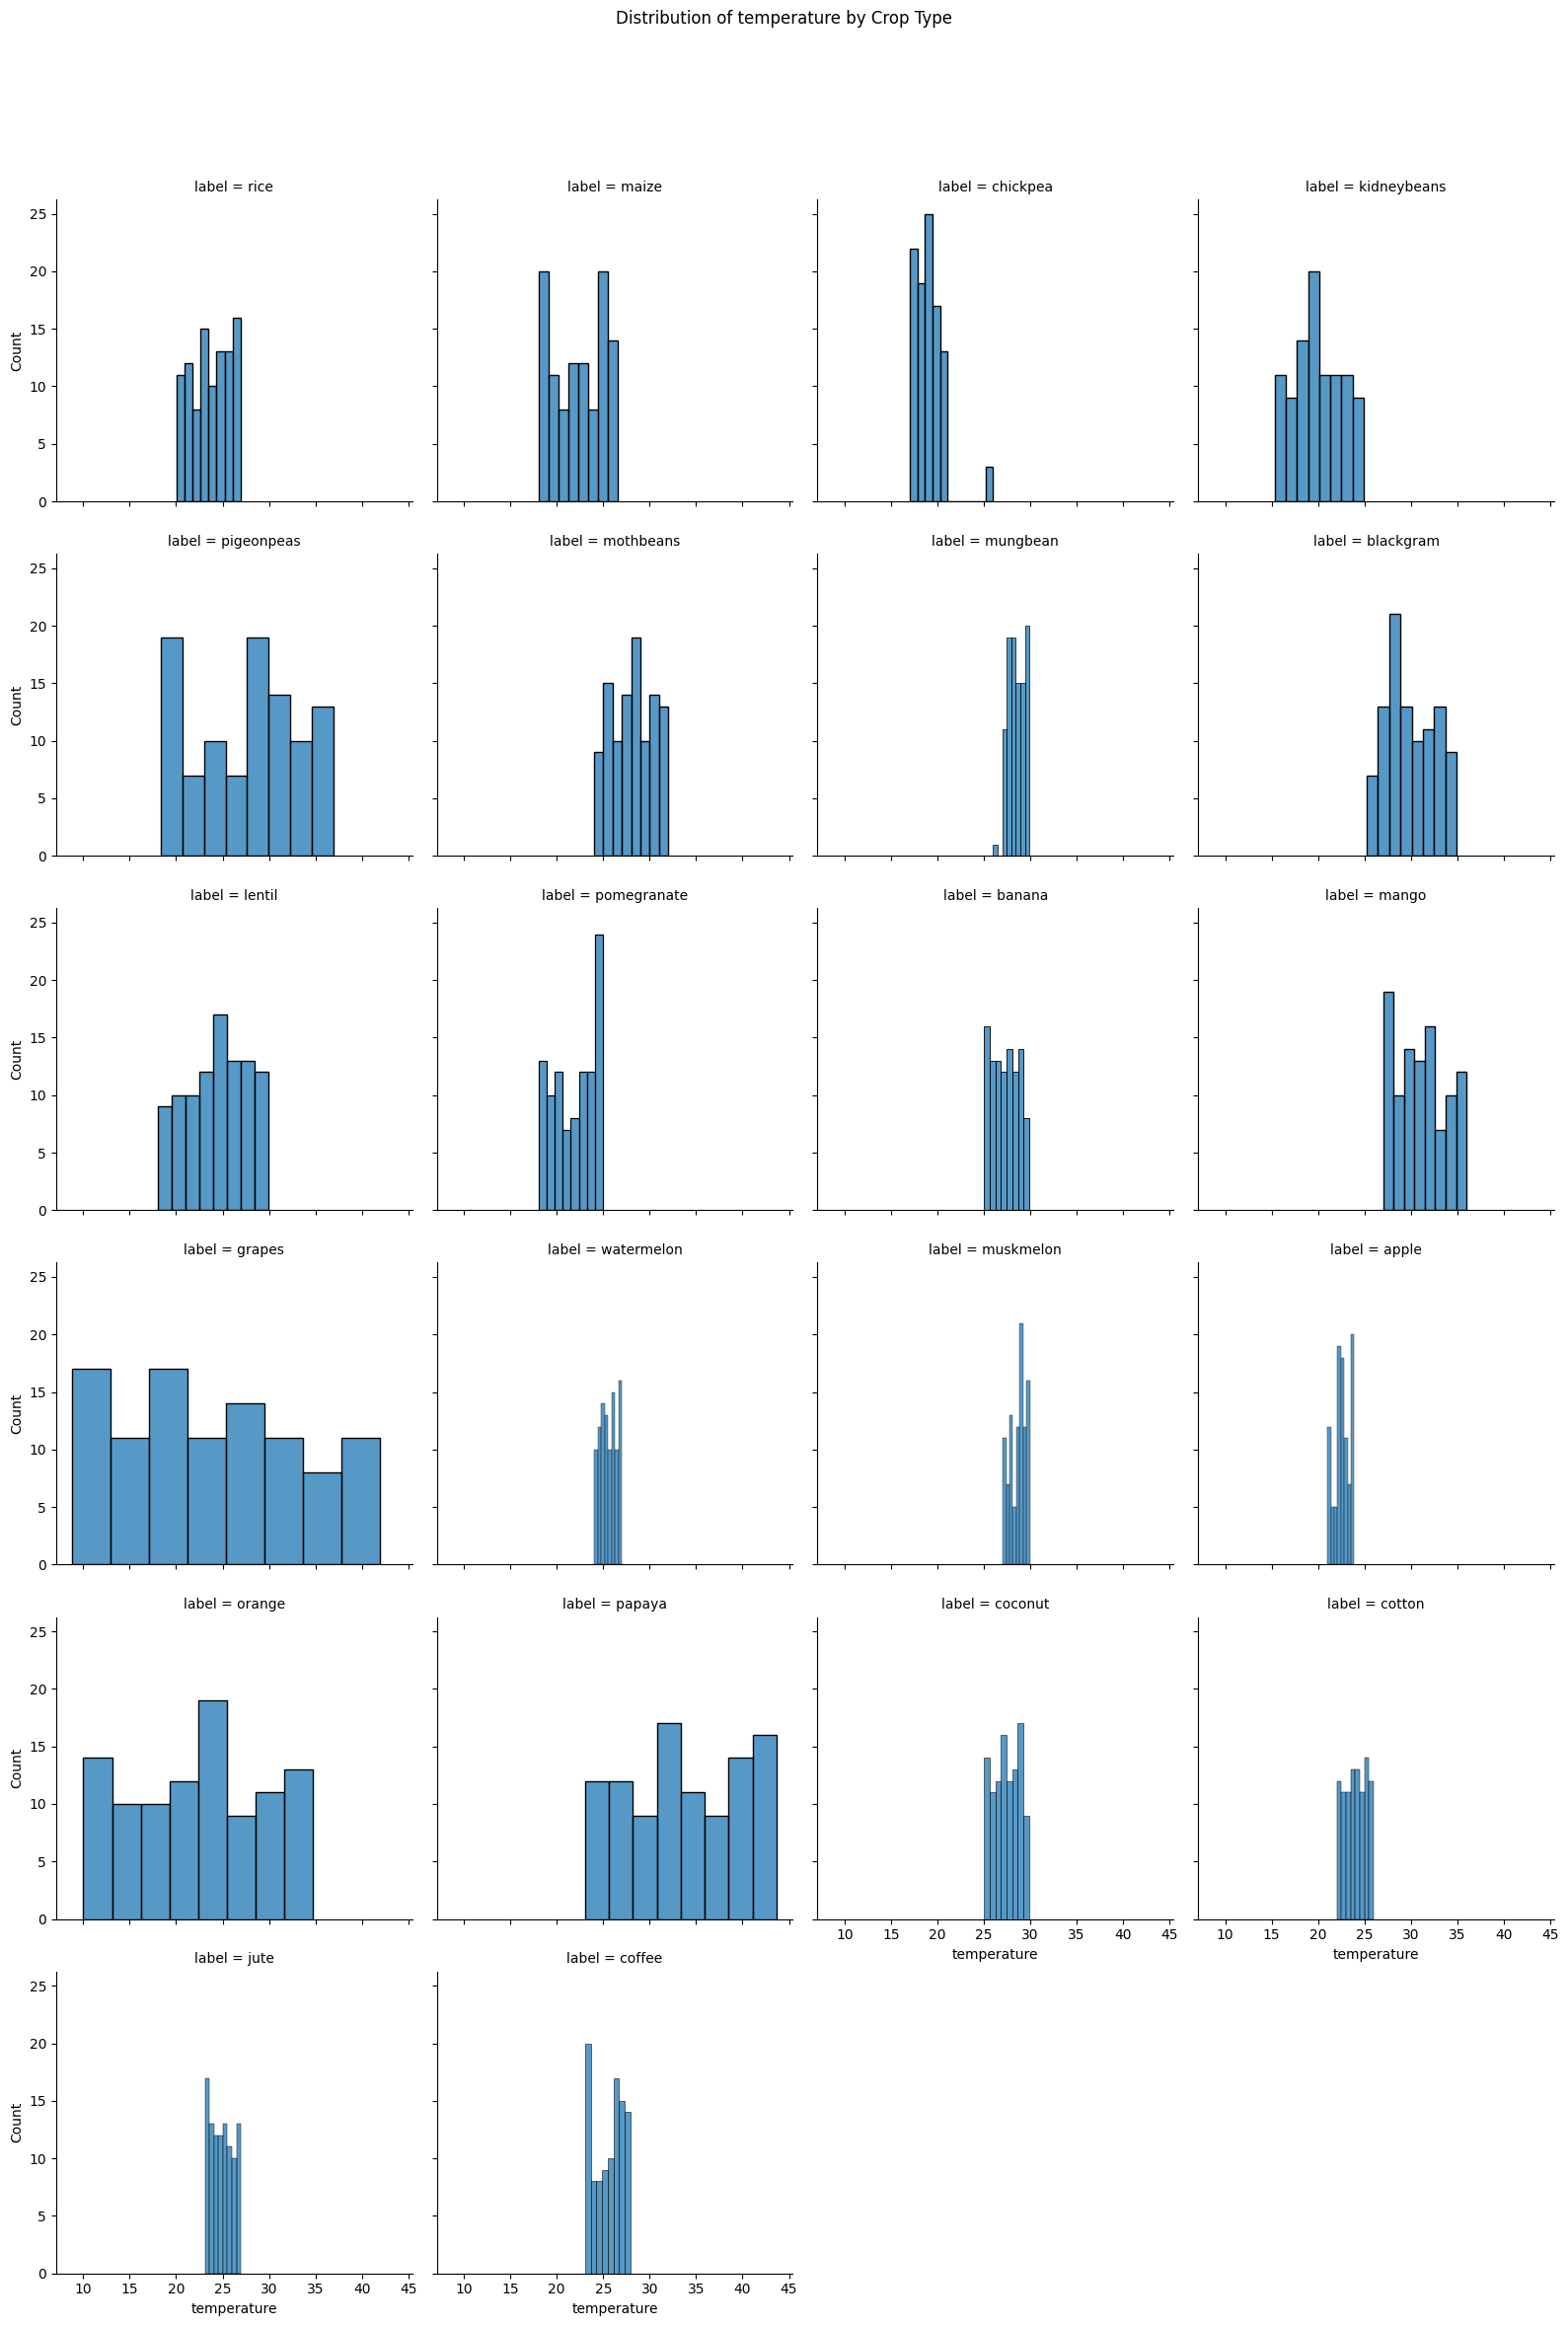

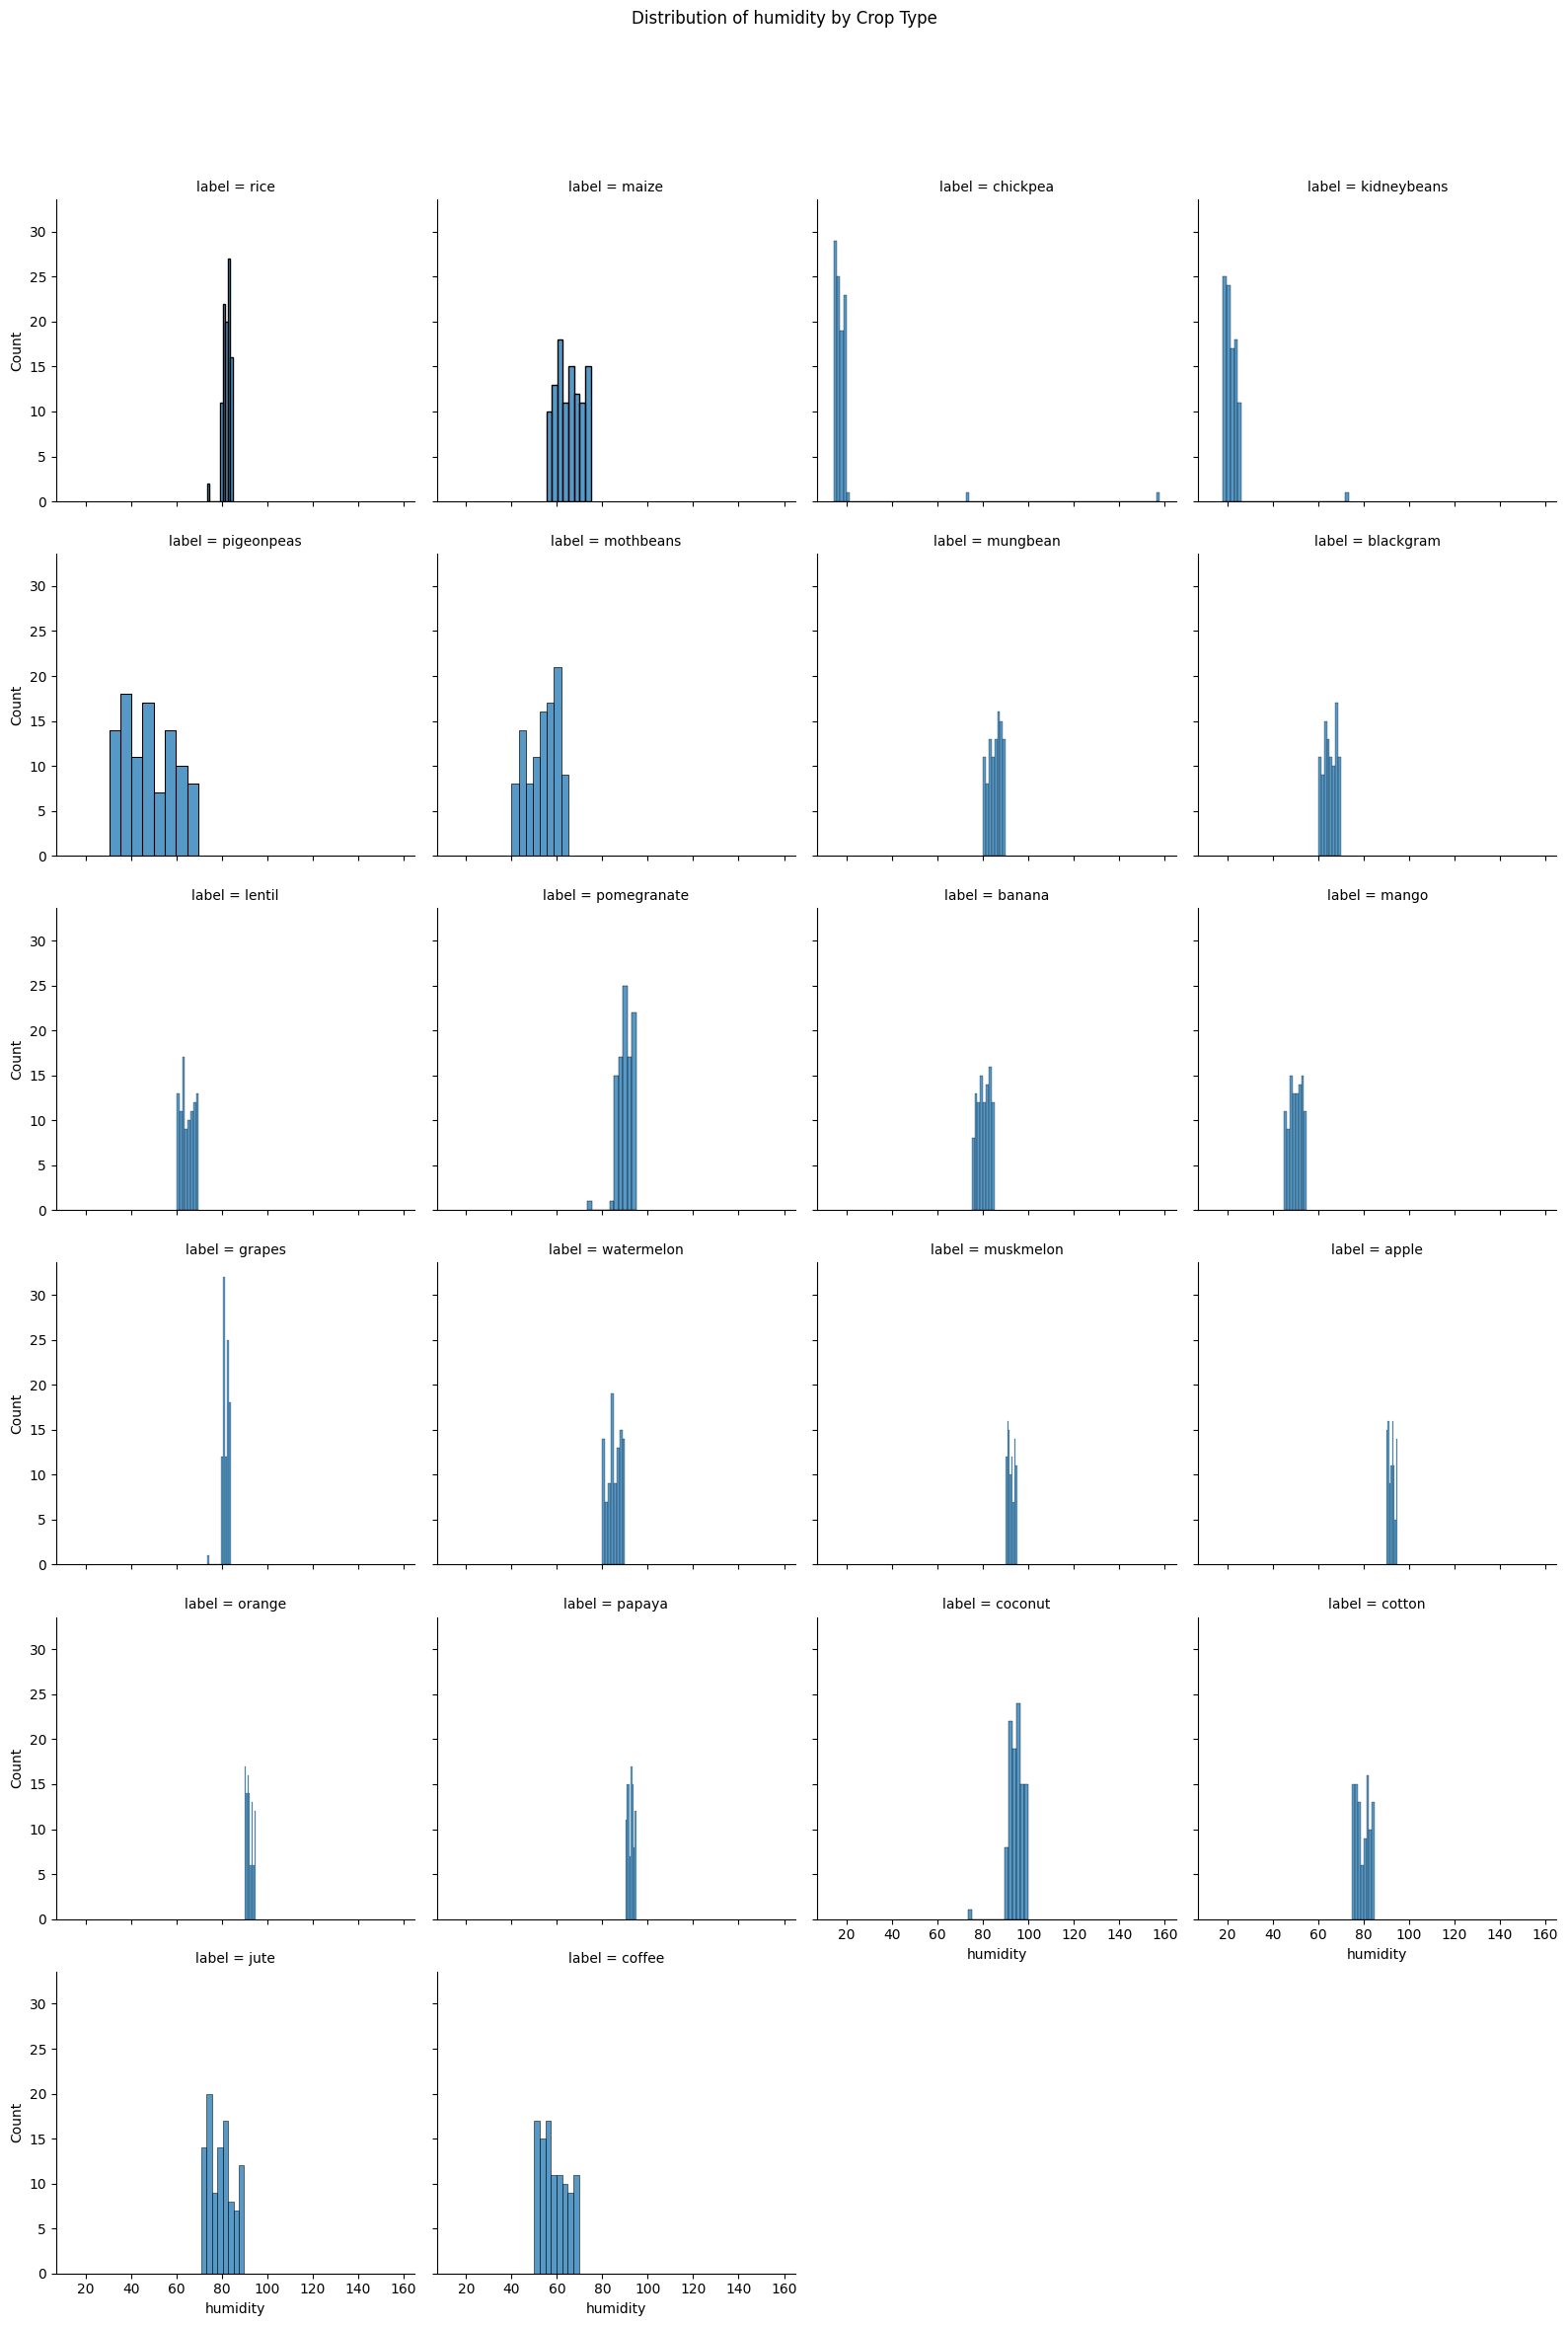

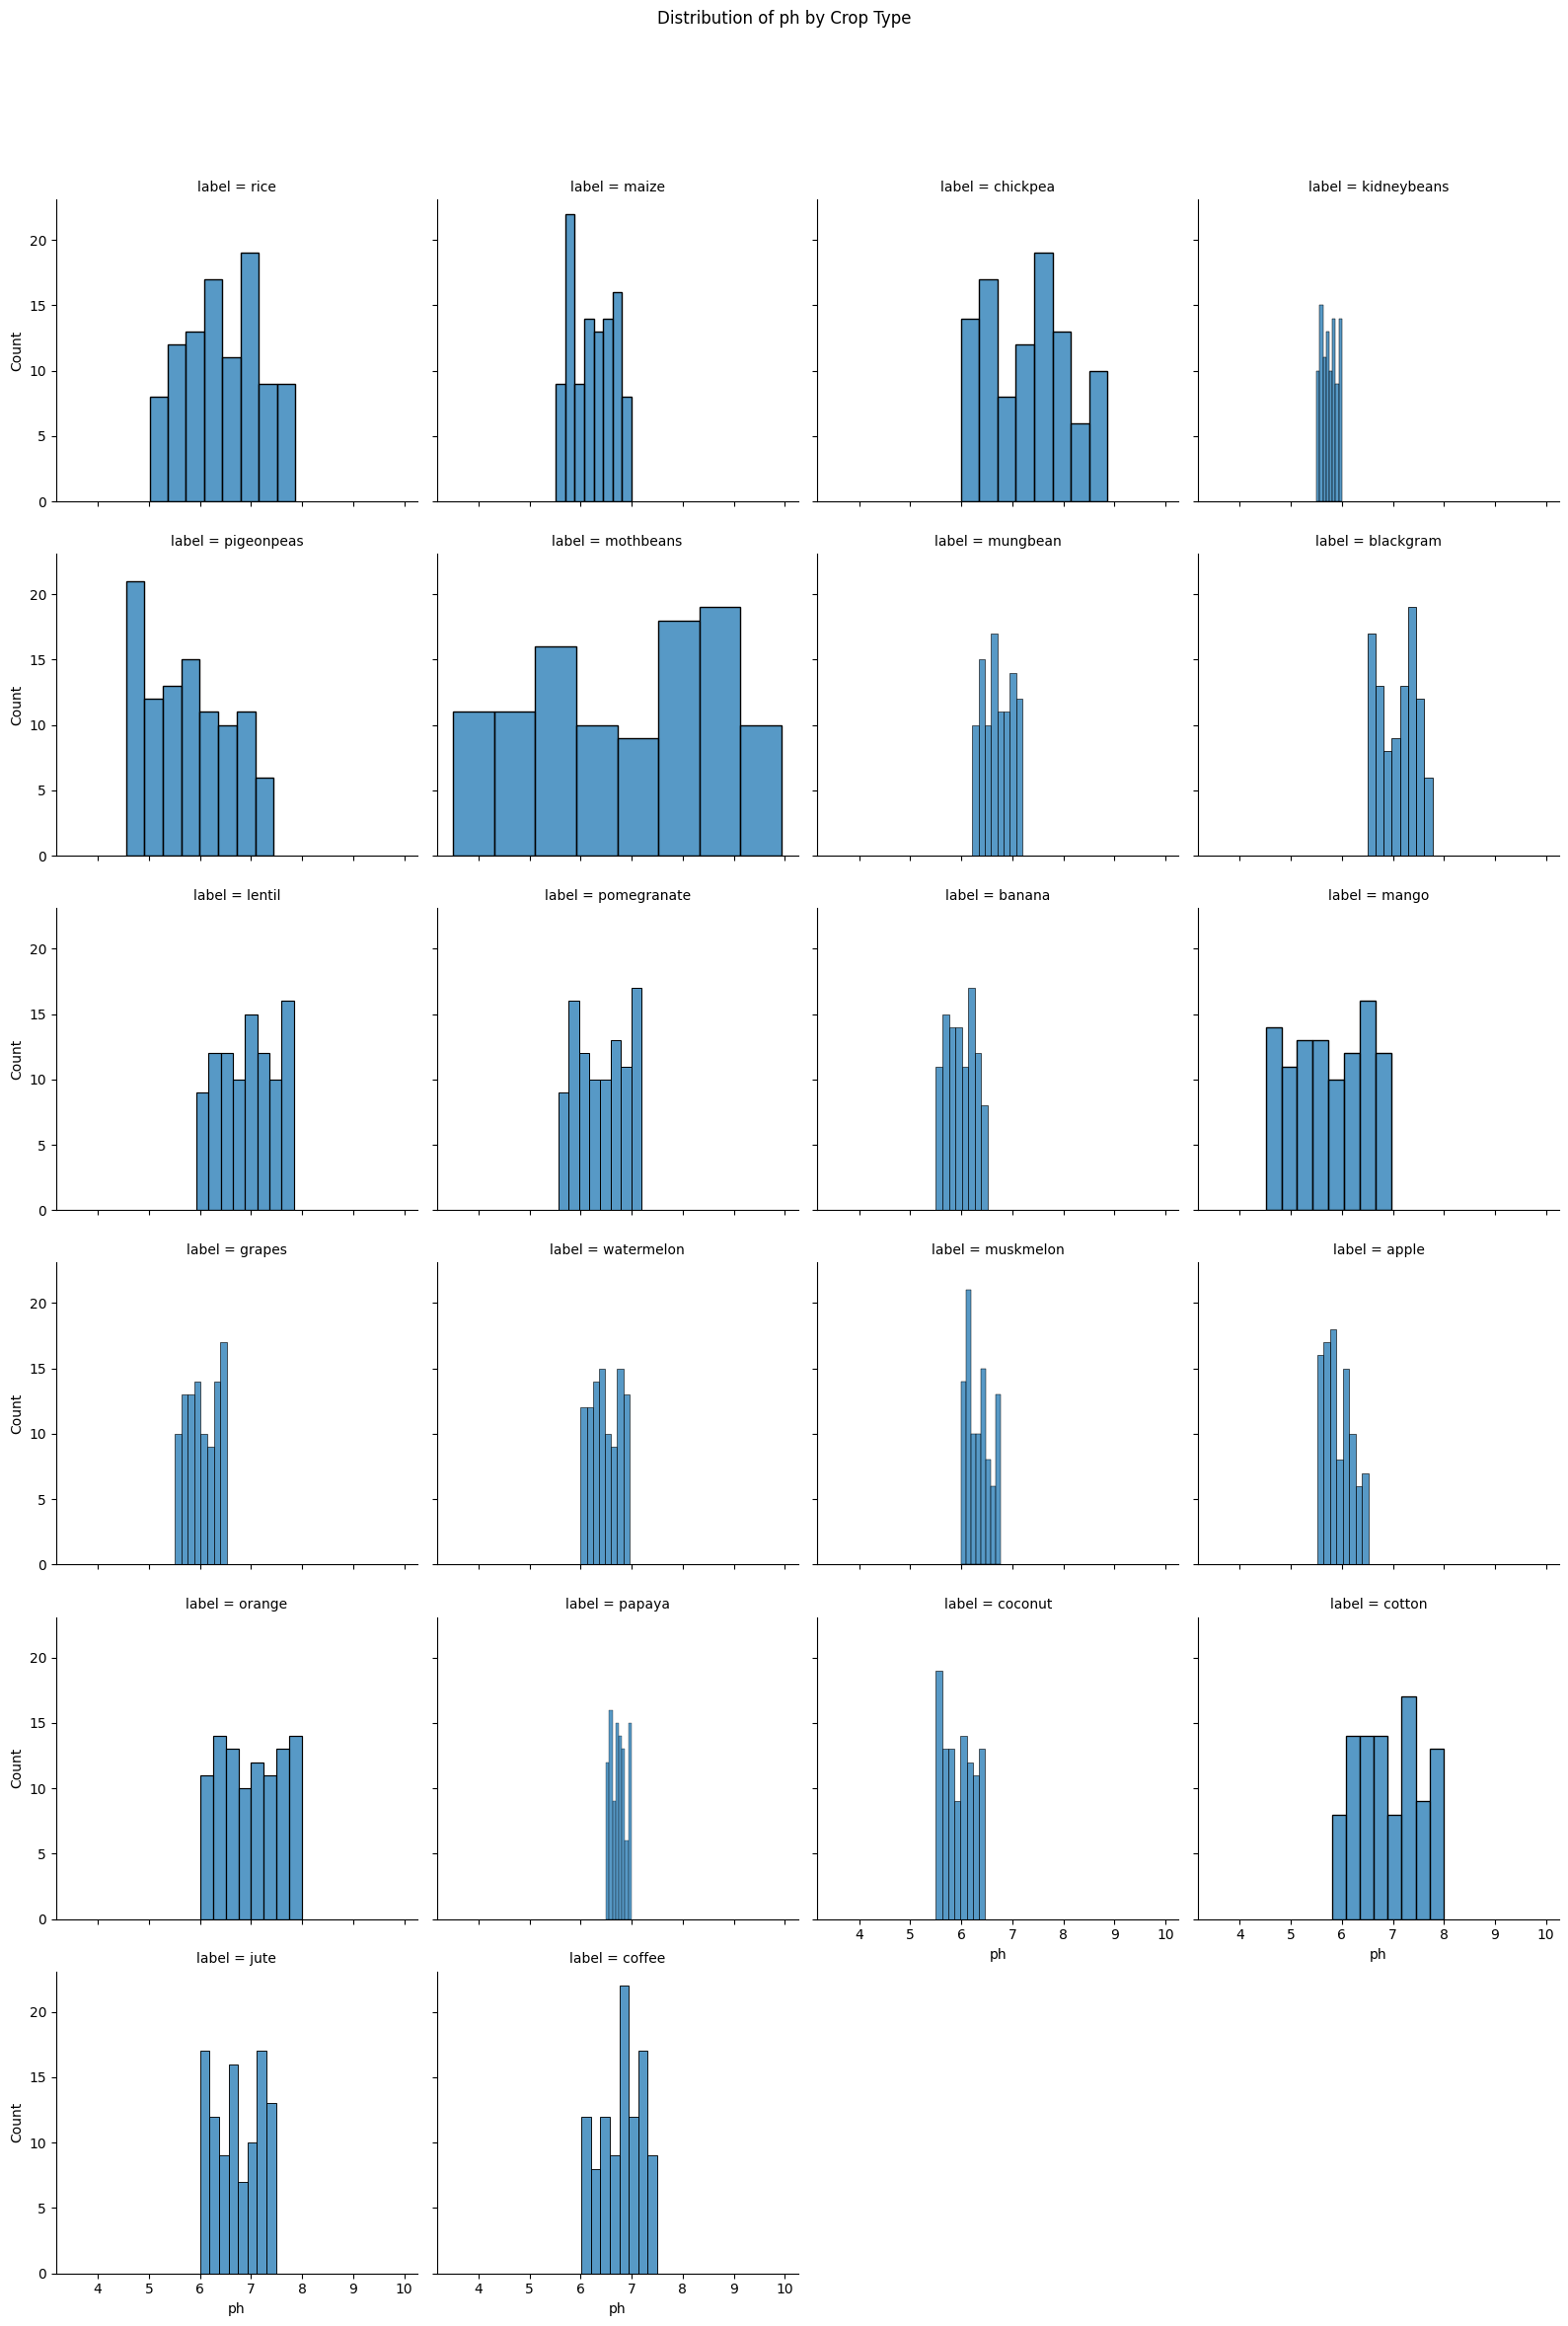

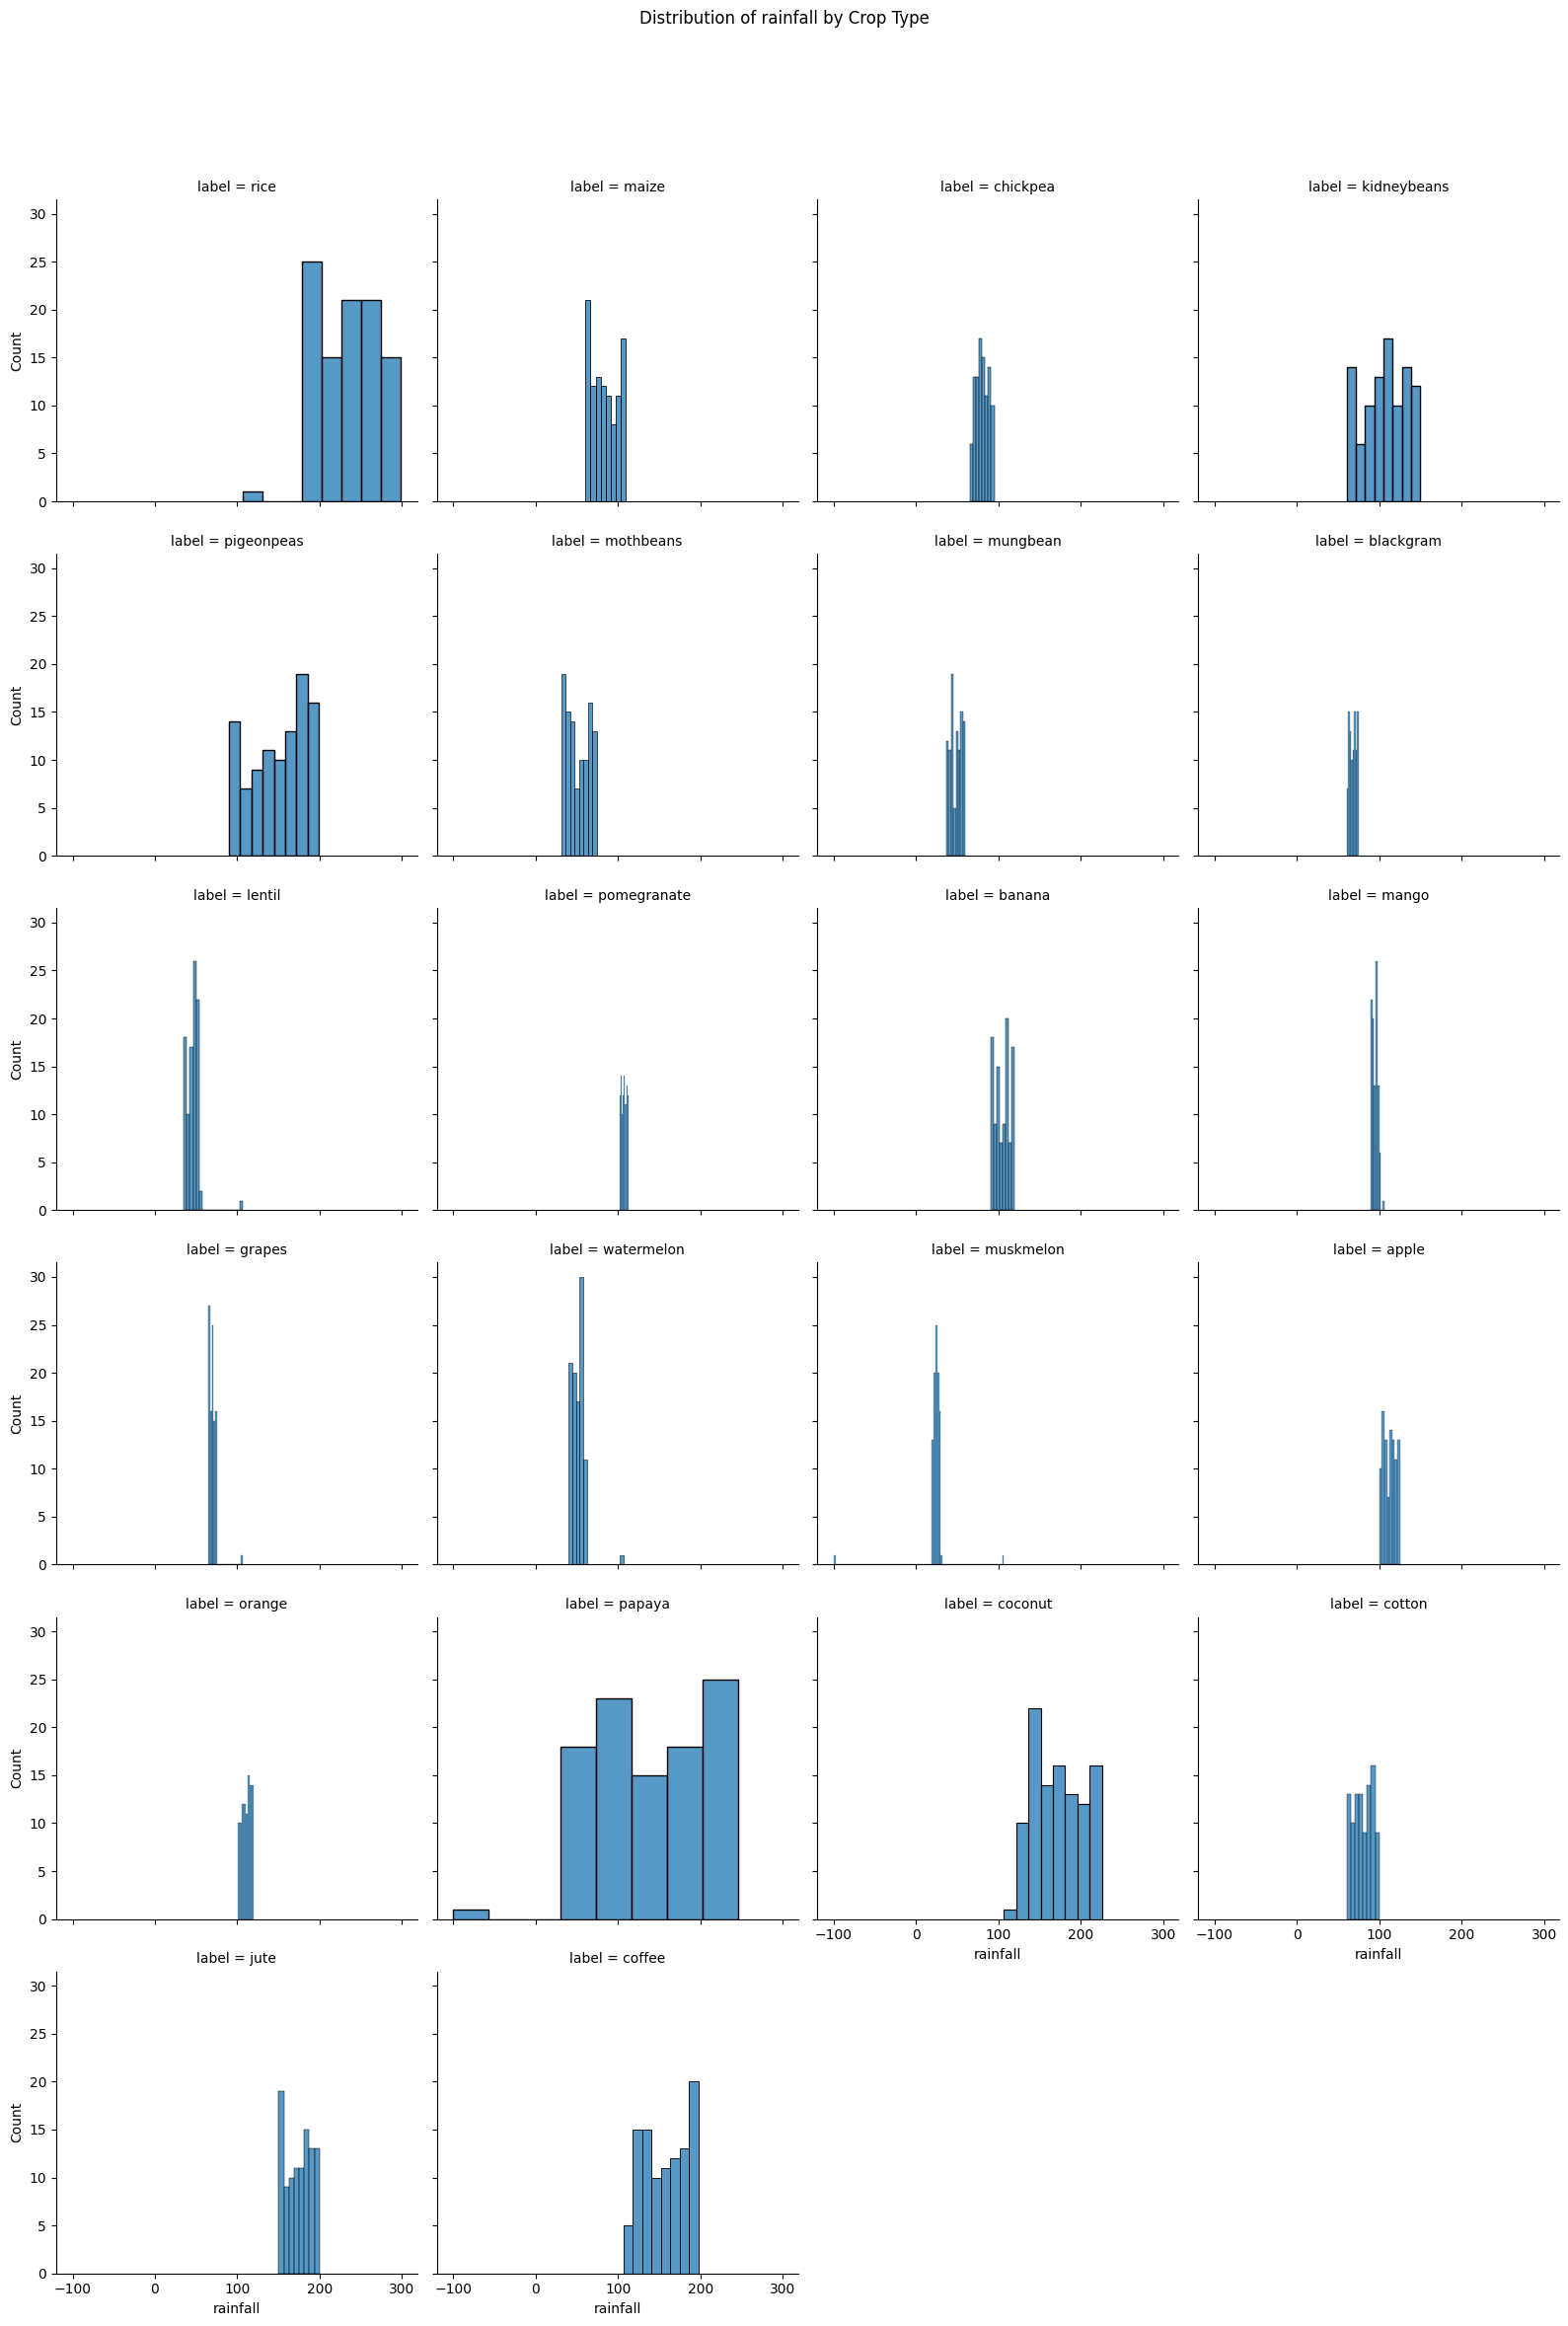

In [18]:
# Faceted distributions
for col in numeric_cols:
    g = sns.FacetGrid(df_cleaned, col='label', col_wrap=4, height=4)
    g.map(sns.histplot, col, kde=False)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribution of {col} by Crop Type')
    plt.show()


## Save Cleaned Dataset to a New File

In [19]:
# Save cleaned dataset to a new file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# DATA VISUALIZATION

## Load the Dataset and Prepare Data

In [20]:
# Load the dataset
data = pd.read_csv('cleaned_dataset.csv')

# Separate features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Initialize Classifiers and Train Models

In [21]:
# Initialize classifiers
classifiers = {
    "SVC": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate classifiers
results = {}
conf_matrices = {}
for name, classifier in classifiers.items():
    if name == "SVC":
        classifier.fit(X_train_scaled, y_train)
        y_pred = classifier.predict(X_test_scaled)
    else:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    conf_matrices[name] = conf_matrix


## Visualize Confusion Matrices

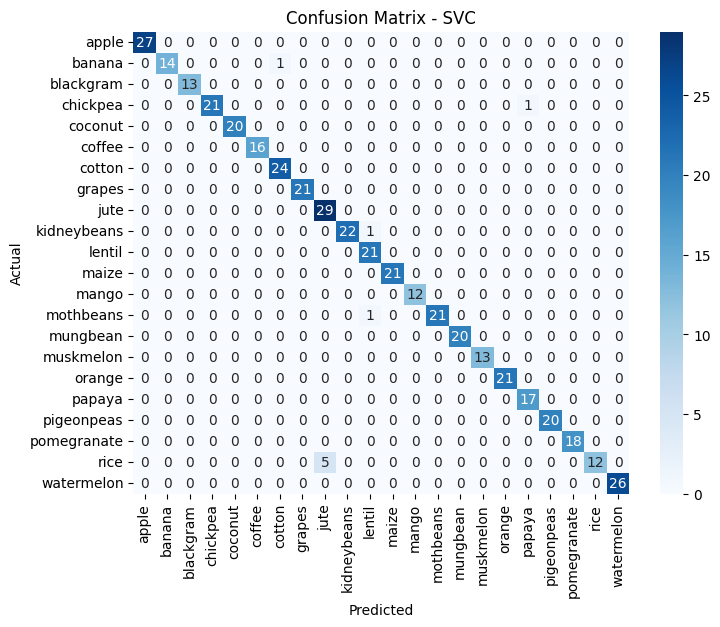

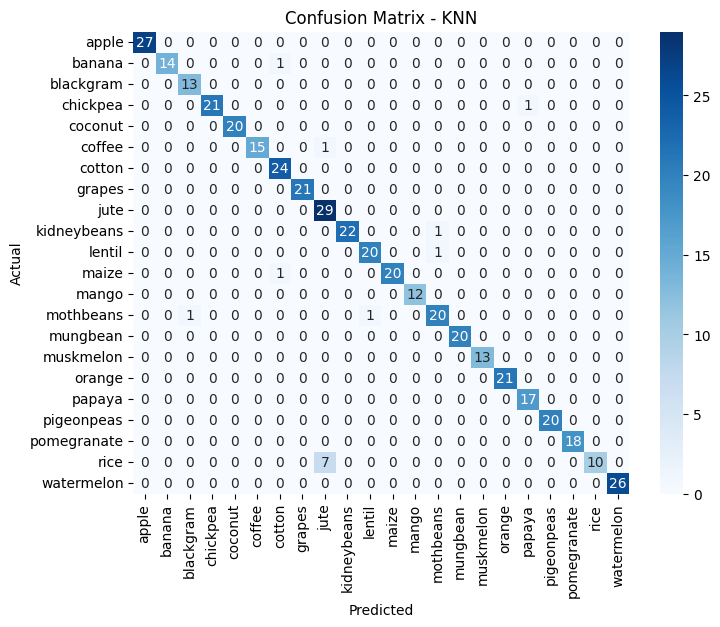

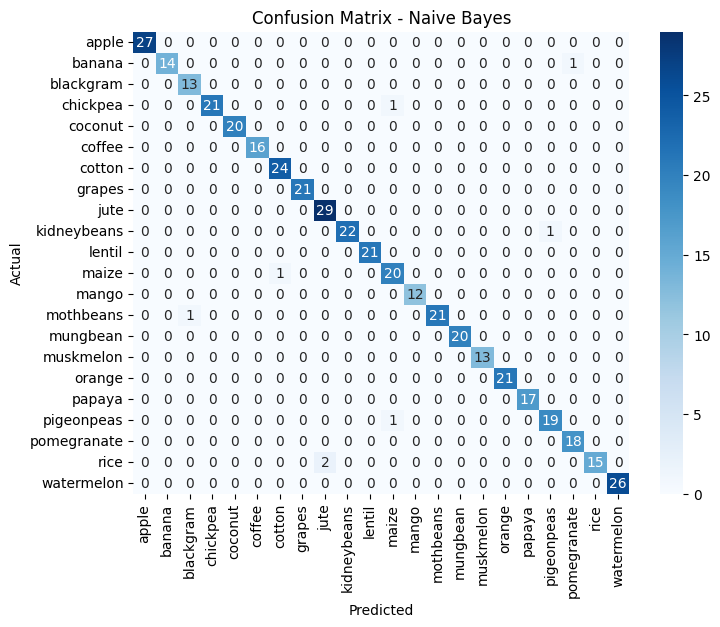

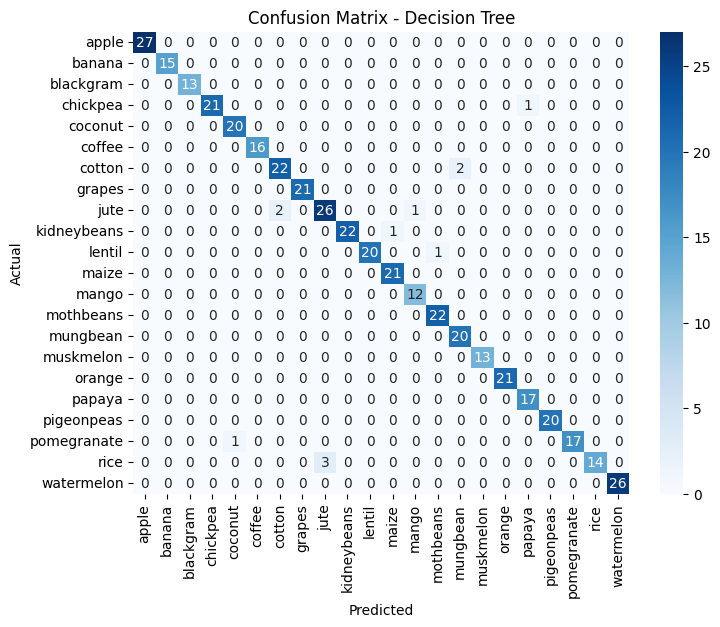

In [23]:
# Visualize confusion matrices
for name, conf_matrix in conf_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


## Print Scores for All Classifiers

In [25]:
# Print scores for all classifiers
for name, metrics in results.items():
    print(f"{name} Metrics:")
    print("Accuracy Score:", metrics["Accuracy"])
    print("Precision Score:", metrics["Precision"])
    print("Recall Score:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print()  # Add empty line for clarity


SVC Metrics:
Accuracy Score: 0.9794520547945206
Precision Score: 0.9817460335997279
Recall Score: 0.9794520547945206
F1 Score: 0.9789628179284294

KNN Metrics:
Accuracy Score: 0.9657534246575342
Precision Score: 0.970343744316347
Recall Score: 0.9657534246575342
F1 Score: 0.9647989515037394

Naive Bayes Metrics:
Accuracy Score: 0.9817351598173516
Precision Score: 0.9826118755692911
Recall Score: 0.9817351598173516
F1 Score: 0.981726814756971

Decision Tree Metrics:
Accuracy Score: 0.9726027397260274
Precision Score: 0.9736320745850228
Recall Score: 0.9726027397260274
F1 Score: 0.9724257026422294



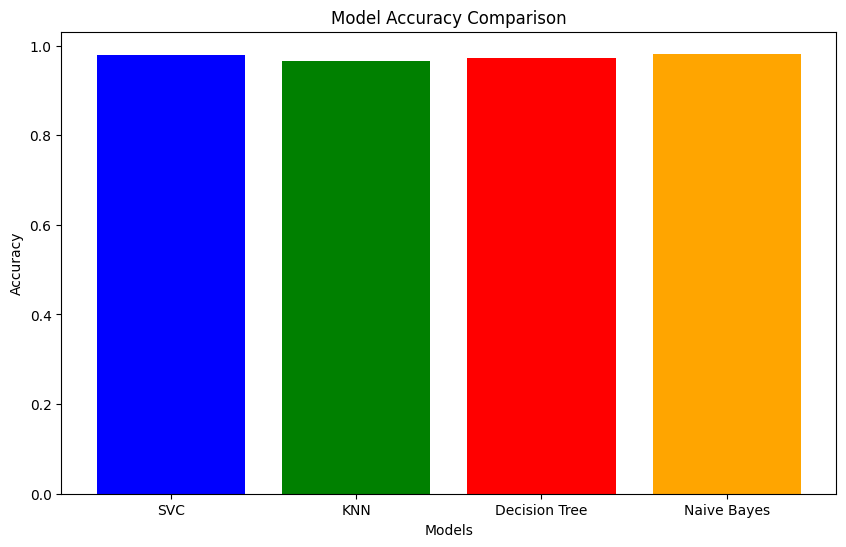

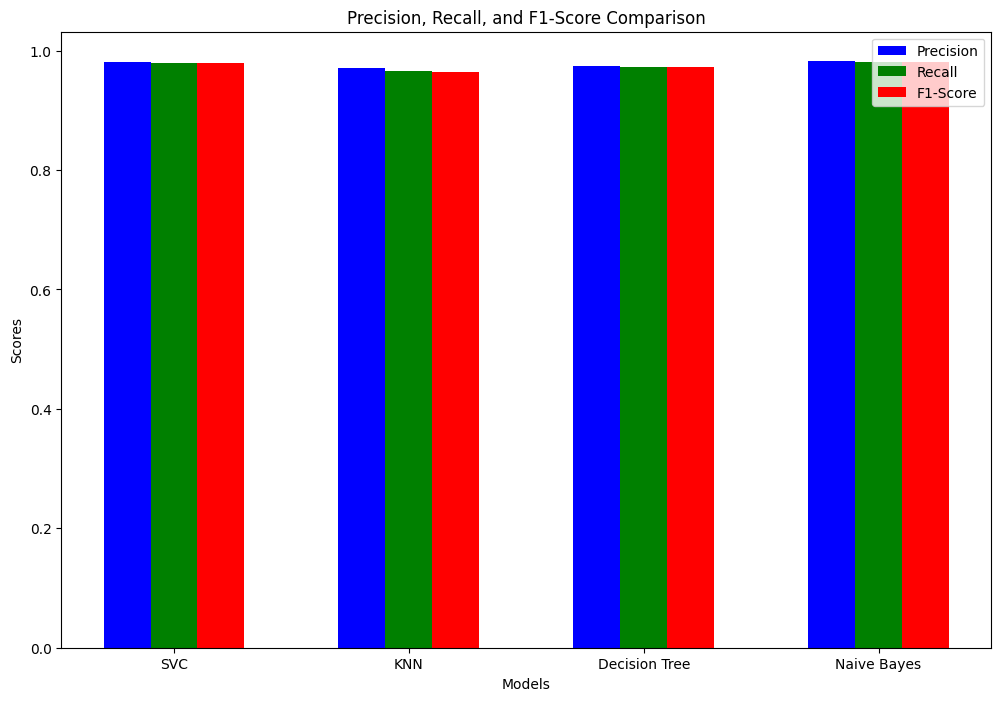

In [4]:
import matplotlib.pyplot as plt

# Accuracy Comparison
models = ['SVC', 'KNN', 'Decision Tree', 'Naive Bayes']
accuracy = [0.979, 0.965, 0.972, 0.982]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Performance Metrics Comparison
precision = [0.9817460335997279, 0.970343744316347, 0.9736320745850228, 0.9826118755692911]
recall = [0.9794520547945206, 0.9657534246575342, 0.9726027397260274, 0.9817351598173516]
f1_score = [0.9789628179284294, 0.9647989515037394, 0.9724257026422294, 0.981726814756971]

x = range(len(models))
width = 0.2

plt.figure(figsize=(12, 8))
plt.bar(x, precision, width=width, label='Precision', color='blue', align='center')
plt.bar([p + width for p in x], recall, width=width, label='Recall', color='green', align='center')
plt.bar([p + width*2 for p in x], f1_score, width=width, label='F1-Score', color='red', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.xticks([p + width for p in x], models)
plt.legend()
plt.show()


## CHECK ALGORITHMS

This section utilizes the previously mentioned algorithms to determine the best crops for the given conditions

In [26]:
print("Please input your data for prediction:")
input_data = {'N': 90.0, 'P': 42.0, 'K': 43.0, 'temperature': 20.87974371, 'humidity': 82.00274423, 'ph': 6.502985292000001, 'rainfall': 202.9355362} 

input_df = pd.DataFrame(input_data, index=[0])

# Scale the input data
input_scaled = scaler.transform(input_df)

# Predict using all classifiers
for name, classifier in classifiers.items():
    if name == "SVC":
        y_pred = classifier.predict(input_scaled)
    else:
        y_pred = classifier.predict(input_df)
    print(f"Prediction using {name}: {label_encoder.inverse_transform(y_pred)}")

Please input your data for prediction:
Prediction using SVC: ['rice']
Prediction using KNN: ['rice']
Prediction using Naive Bayes: ['rice']
Prediction using Decision Tree: ['rice']
